# Problem Statement 1
## Digital Ads Data:
The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. 

Use Clustering procedure to segment ads into homogeneous groups.


•	Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings('ignore')

In [50]:
df=pd.read_excel("C:/Users/user/Desktop/PGDSBA/Machine Learning 1/ML1 Project/Clustering+Clean+Ads_Data.xlsx")
df.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [51]:
df.tail()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type Format  Available_Impressions  Matched_Queries  \
23061      Web      Mobile  Video                      1                1   
23062      Web     Desktop  Video                      3                2   
23063      App      Mobile  Video                      2                1   
23064    Video      Mobile  Video                      7                1   
23065      App      Mobile  Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue  CTR  CPM  CPC  
23061            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23062            2       1   0.04  0.35   0.0260  NaN  NaN  NaN  
23063            1       1   0.05  0.35   0.0325  NaN  NaN  NaN  
23064            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23065            2       1   0.09  0.35   0.0585  NaN  NaN  NaN

In [52]:
df.shape
#has 23066 columns and 19 rows

(23066, 19)

In [53]:
df.info()
#has 13 numerical values and 6 categorical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [54]:
df.isnull().sum()
#CTR CPM & CPC hasve null values

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [55]:
df.duplicated().sum()
#there are no duplicated values

0

In [56]:
columns = df.columns
columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

In [57]:
df.InventoryType.value_counts()

InventoryType
Format4    7165
Format5    4249
Format1    3814
Format3    3540
Format6    1850
Format2    1789
Format7     659
Name: count, dtype: int64

In [58]:
df["Ad Type"].value_counts()
    

Ad Type
Inter224    1658
Inter217    1655
Inter223    1654
Inter219    1650
Inter221    1650
Inter222    1649
Inter229    1648
Inter227    1647
Inter218    1645
inter230    1644
Inter220    1644
Inter225    1643
Inter226    1640
Inter228    1639
Name: count, dtype: int64

In [59]:
df["Device Type"].value_counts()

Device Type
Mobile     14806
Desktop     8260
Name: count, dtype: int64

In [60]:
df["Platform"].value_counts()

Platform
Video    9873
Web      8251
App      4942
Name: count, dtype: int64

•	Treat missing values in CPC, CTR and CPM using the formula given. You may refer to the Bank_KMeans Solution File  to understand the coding behind treating the missing values using a specific formula. You have to basically create an user defined function and then call the function for imputing. 

In [61]:
df.describe().round(2)

Ad - Length  Ad- Width    Ad Size  Available_Impressions  \
count     23066.00   23066.00   23066.00               23066.00   
mean        385.16     337.90   96674.47             2432043.67   
std         233.65     203.09   61538.33             4742887.76   
min         120.00      70.00   33600.00                   1.00   
25%         120.00     250.00   72000.00               33672.25   
50%         300.00     300.00   72000.00              483771.00   
75%         720.00     600.00   84000.00             2527711.75   
max         728.00     600.00  216000.00            27592861.00   

       Matched_Queries  Impressions     Clicks     Spend       Fee   Revenue  \
count         23066.00     23066.00   23066.00  23066.00  23066.00  23066.00   
mean        1295099.14   1241519.52   10678.52   2706.63      0.34   1924.25   
std         2512969.86   2429399.96   17353.41   4067.93      0.03   3105.24   
min               1.00         1.00       1.00      0.00      0.21      0.00   
25%           18282.50      7990.50     710.00     85.18      0.33     55.37   
50%          258087.50    225290.00    4425.00   1425.12      0.35    926.34   
75%         1180700.00   1112428.50   12793.75   3121.40      0.35   2091.34   
max        14702025.00  14194774.00  143049.00  26931.87      0.35  21276.18   

            CTR       CPM       CPC  
count  18330.00  18330.00  18330.00  
mean       0.07      7.67      0.35  
std        0.08      6.48      0.34  
min        0.00      0.00      0.00  
25%        0.00      1.71      0.09  
50%        0.08      7.66      0.16  
75%        0.13     12.51      0.57  
max        1.00     81.56      7.26

Observations:


## Treat Missing values
Formula:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000

CPC = Total Cost (spend) / Number of Clicks

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100

In [62]:
#defining function for calculating CPM
def CPM(x):
    Spend=df.Spend
    Impressions=df.Impressions
    CPM = ((Spend/Impressions)*1000)
    return CPM

In [63]:
#using lambda function to impute values of CPM and treate missing values
df['CPM']= df[['CPM']].apply(lambda x: CPM(x))

In [64]:
df.isnull().sum()
#No missing in CPM treated 

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                         0
CPC                      4736
dtype: int64

In [65]:
def CTR(x):
    Spend=df.Spend
    Clicks=df.Clicks
    CTR = (Spend/Clicks)
    return CTR

def CPC(x):
    Clicks=df.Clicks
    Impressions=df.Impressions
    CPC = ((Clicks/Impressions)*100)
    return CPC

In [66]:
df['CTR']= df[['CTR']].apply(lambda x: CTR(x))
df['CPC']= df[['CPC']].apply(lambda x: CPC(x))

In [67]:
df.isnull().sum()

# no missing values are present after treatement

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

Check if there are any outliers.

In [68]:
#Check the number of features
len(df.columns)

19

In [69]:
df_cat = df.select_dtypes(include = ['object'])
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

13

In [70]:
lstnumericcolumns

['Ad - Length',
 'Ad- Width',
 'Ad Size',
 'Available_Impressions',
 'Matched_Queries',
 'Impressions',
 'Clicks',
 'Spend',
 'Fee',
 'Revenue',
 'CTR',
 'CPM',
 'CPC']

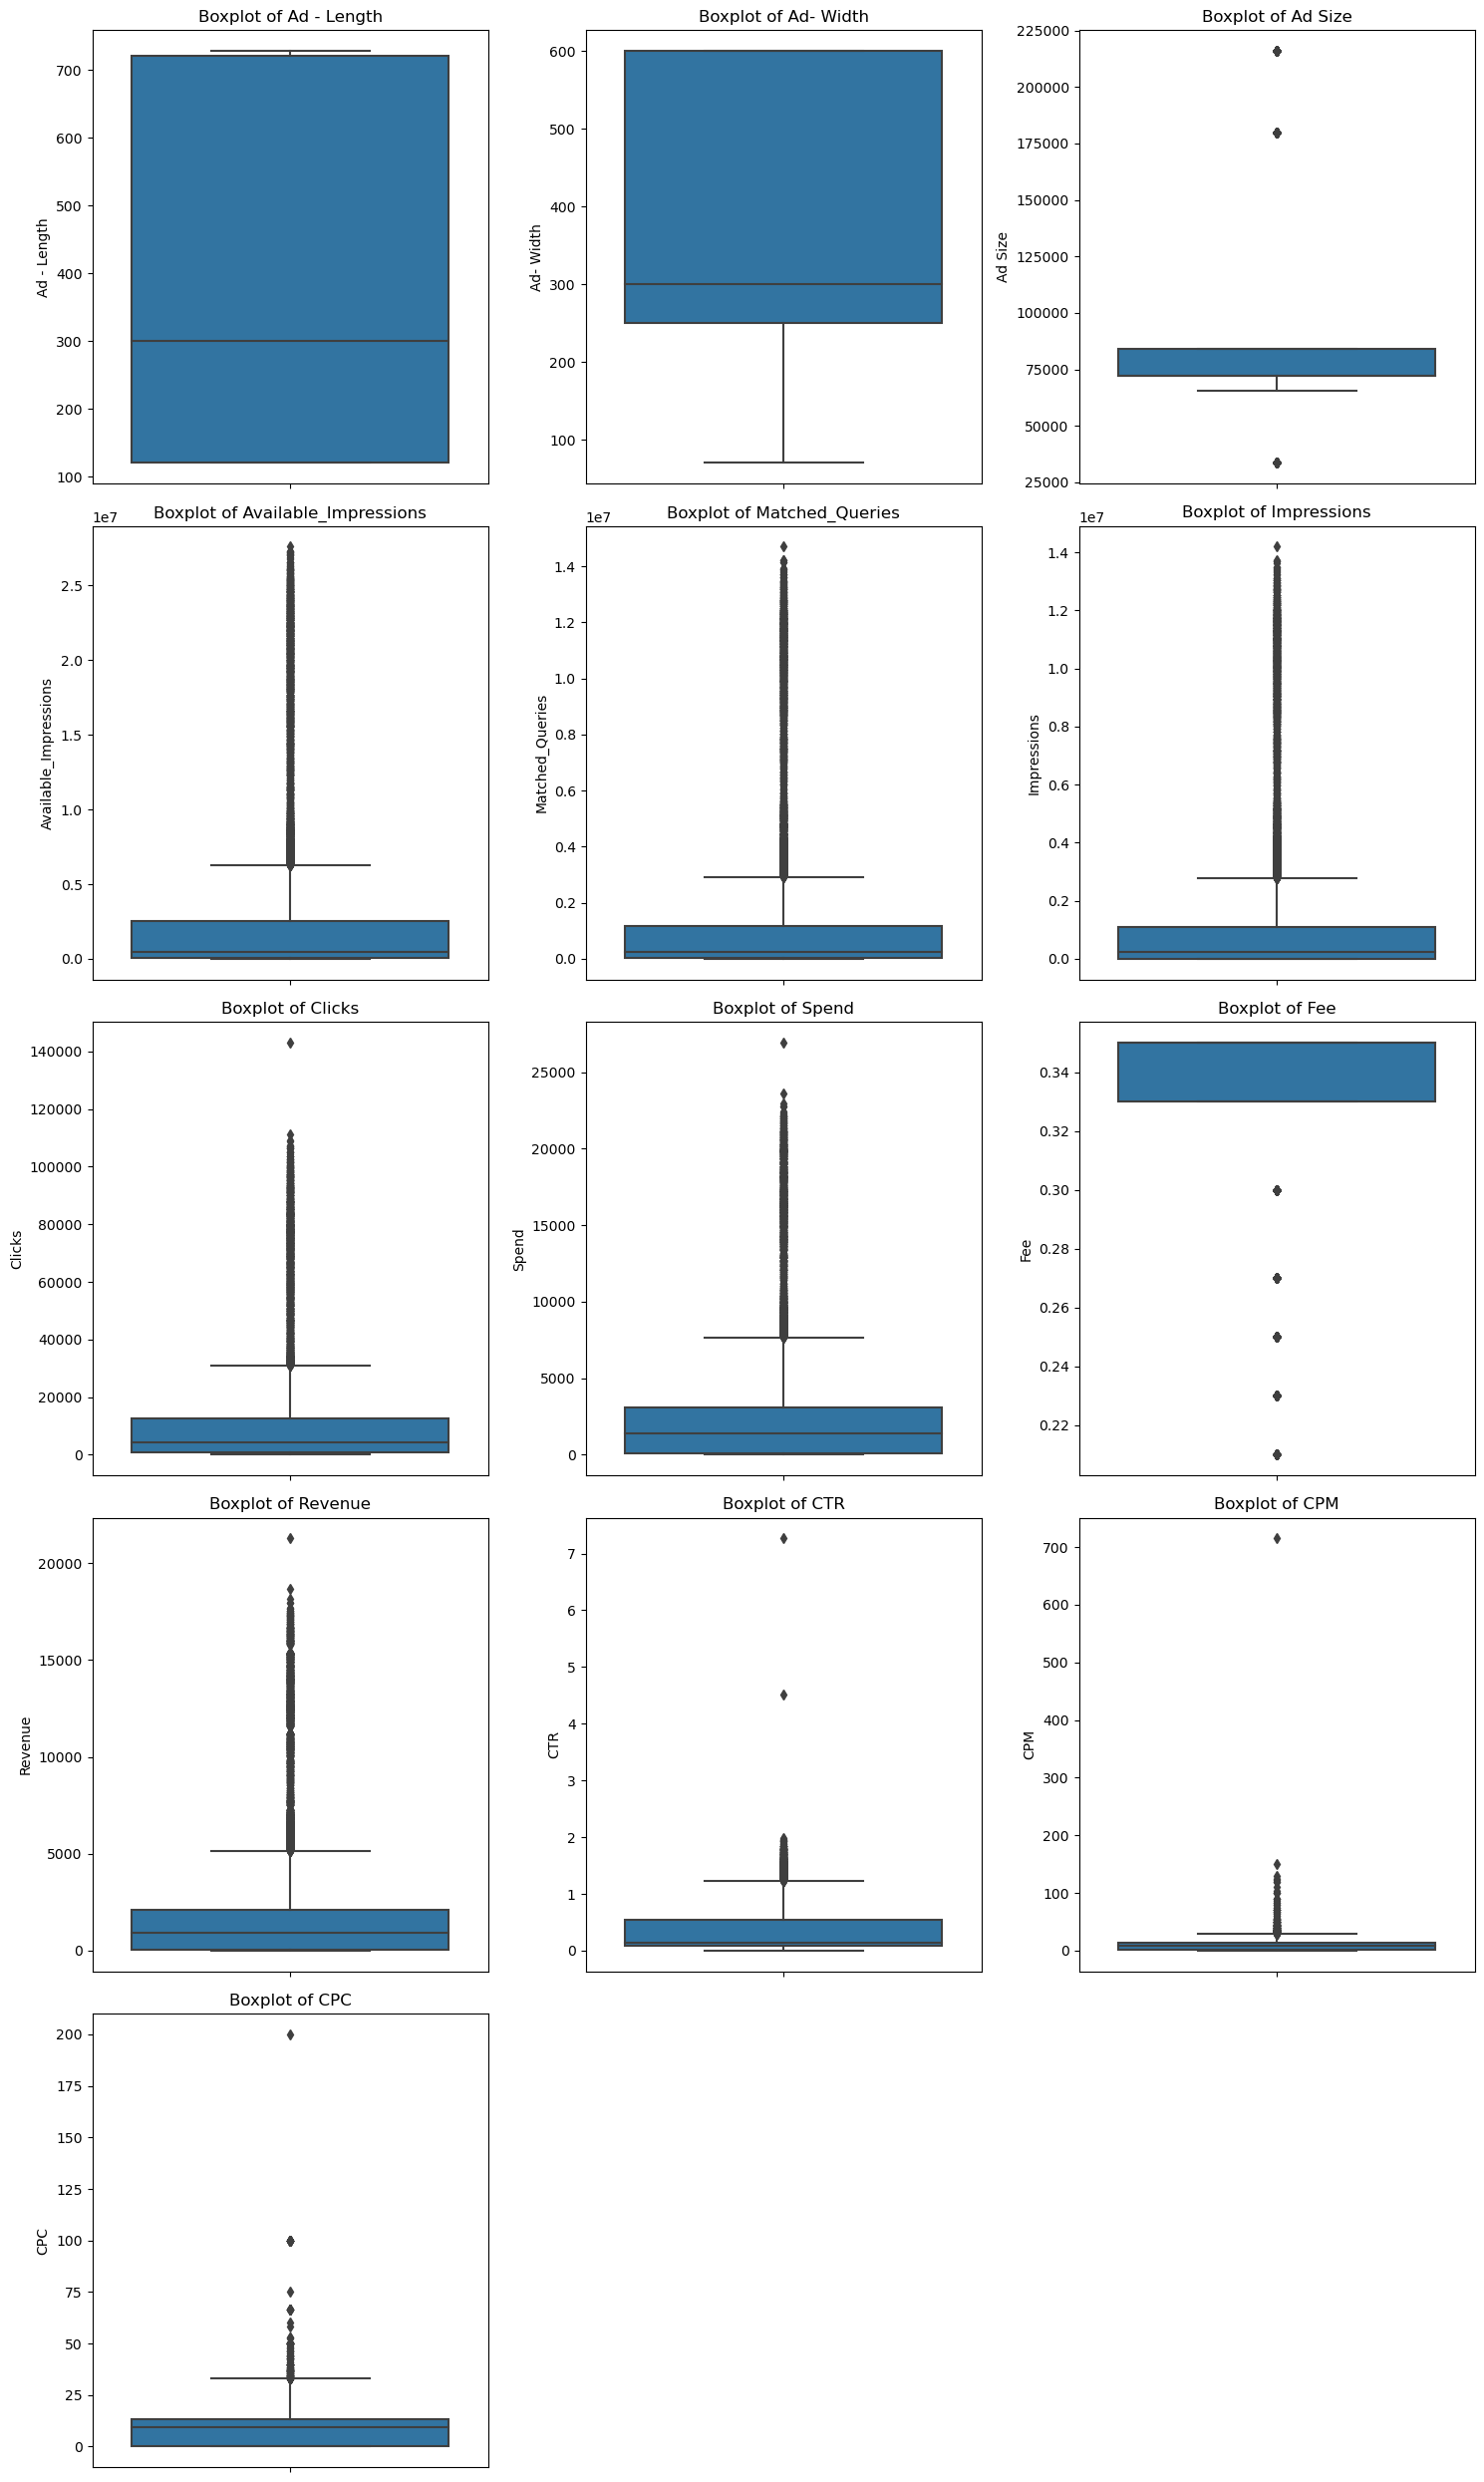

In [71]:
#Check for presence of outliers in each feature
plt.figure(figsize = (15,25))
plt.title("Boxplot of Numerical Values")
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

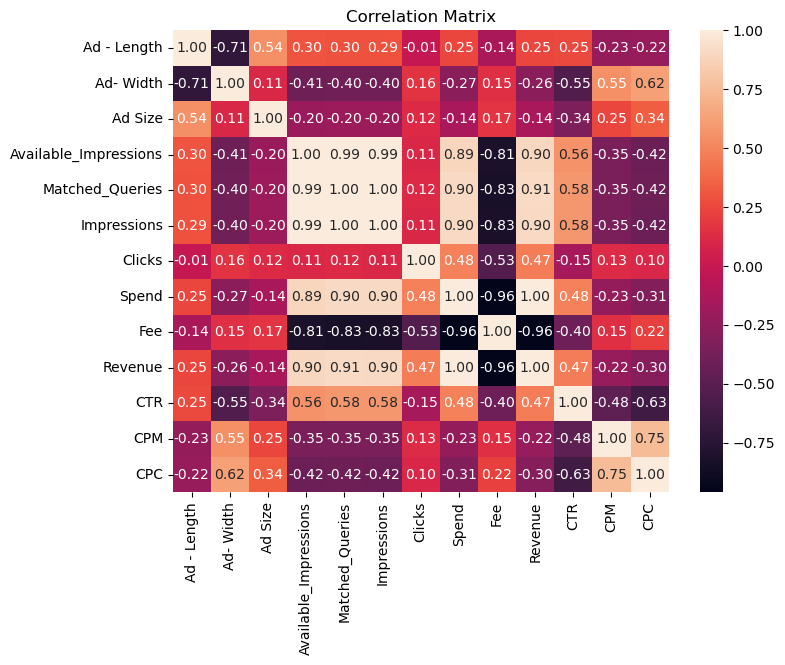

In [72]:
#check for presence of correlations
plt.figure(figsize=(8,6))
plt.title("Correlation Matrix")
sns.heatmap(df_num.corr(), annot=True, fmt='.2f');

In [73]:
#Bivariate Analysis

## Observation
We can see that Ad size, Available Impressions, Matched queries, Impressions, Clicks, Spend, Fee, Revenue, CTR, CPM and CPC have outliers.

We will treat these outliers

In [74]:
#define function that returns upper an dlower limit to detect outliers for each feature
def remove_outliers(col):
    q1,q3 =col.quantile([0.25,0.75])
    IQR =q3-q1
    lower_range =q1-(1.5*IQR)
    upper_range = q3 + (1.5*IQR)
    
    return lower_range, upper_range
#cap and floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL =remove_outliers(df_num[i])
    df_num[i]=np.where(df_num[i]>UL,UL,df_num[i])
    df_num[i]=np.where(df_num[i]<LL,LL,df_num[i])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            23066 non-null  float64
 1   Ad- Width              23066 non-null  float64
 2   Ad Size                23066 non-null  float64
 3   Available_Impressions  23066 non-null  float64
 4   Matched_Queries        23066 non-null  float64
 5   Impressions            23066 non-null  float64
 6   Clicks                 23066 non-null  float64
 7   Spend                  23066 non-null  float64
 8   Fee                    23066 non-null  float64
 9   Revenue                23066 non-null  float64
 10  CTR                    23066 non-null  float64
 11  CPM                    23066 non-null  float64
 12  CPC                    23066 non-null  float64
dtypes: float64(13)
memory usage: 2.3 MB


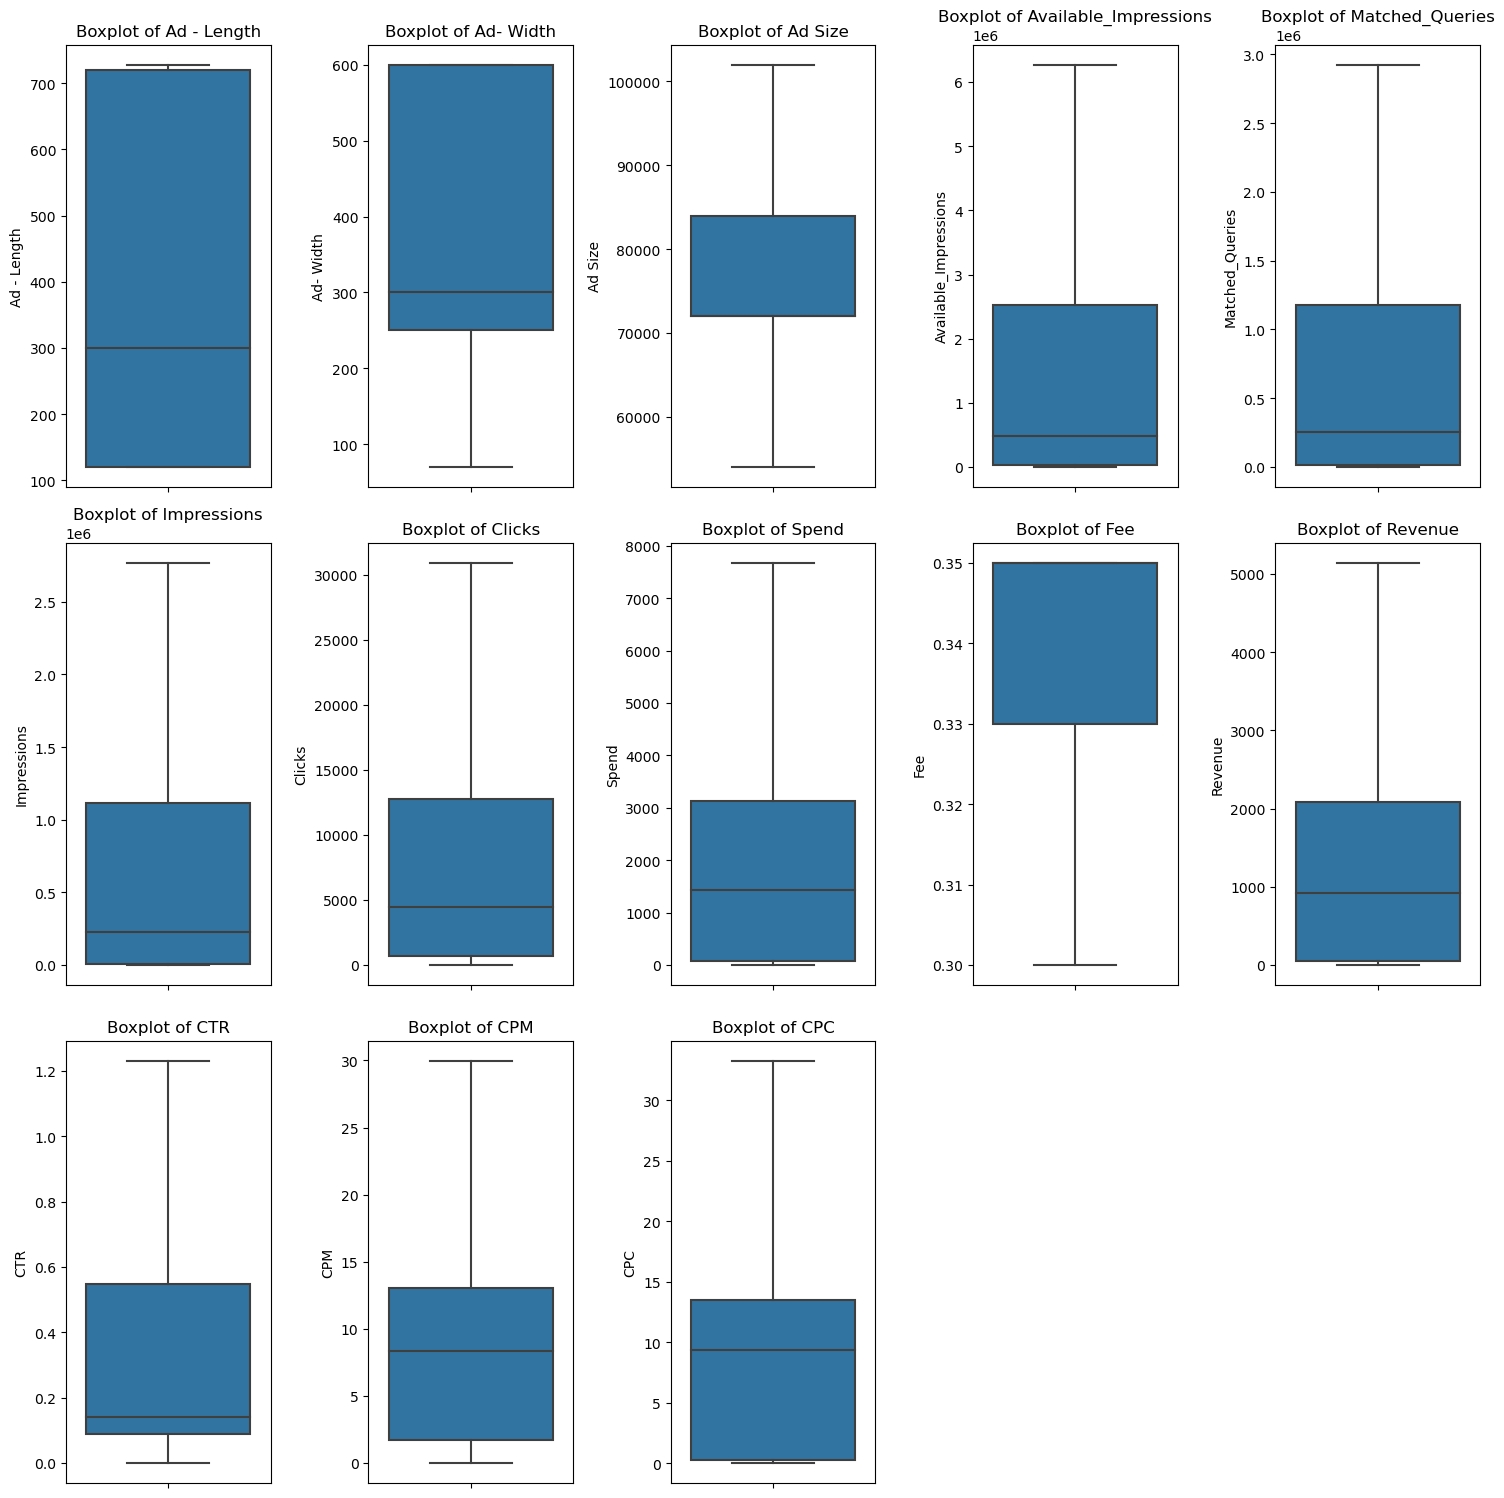

In [75]:
#Checkagain if outliers are present
plt.figure(figsize = (15,25))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

## Question
Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).

## Answer
Yes, treating outliers is an essential step before performing clustering, and here's why:

Clustering algorithms, such as K-means and Hierarchical Clustering, are sensitive to outliers. Outliers can significantly distort the shape and scale of the data distribution, which can lead to misleading clusters. For example:


### K-means Clustering: 
The presence of outliers can affect the calculation of centroids, as the centroids might get pulled towards the outliers, leading to non-representative clusters. K-means aims to minimize within-cluster variances, and outliers can inflate this variance, causing the algorithm to produce clusters that are not intuitive or useful.


### Hierarchical Clustering: 
Since this method relies on distance measures to merge or split clusters at each step, outliers can distort these distances. A single outlier can appear as a separate cluster or cause other data points to merge incorrectly, affecting the overall hierarchy and potentially leading to incorrect conclusions about the data structure.

In [76]:
# we will do scaling of the data

from scipy.stats import zscore
dfscaled =df_num.apply(zscore)

In [77]:
dfscaled.head()

Ad - Length  Ad- Width   Ad Size  Available_Impressions  Matched_Queries  \
0    -0.364496  -0.432797 -0.102518              -0.755333        -0.778949   
1    -0.364496  -0.432797 -0.102518              -0.755345        -0.778988   
2    -0.364496  -0.432797 -0.102518              -0.754900        -0.778919   
3    -0.364496  -0.432797 -0.102518              -0.755040        -0.778781   
4    -0.364496  -0.432797 -0.102518              -0.755610        -0.779030   

   Impressions    Clicks    Spend       Fee   Revenue       CTR       CPM  \
0    -0.768478 -0.867488 -0.89317  0.535724 -0.880093 -1.042561 -1.194498   
1    -0.768516 -0.867488 -0.89317  0.535724 -0.880093 -1.042561 -1.194498   
2    -0.768445 -0.867488 -0.89317  0.535724 -0.880093 -1.042561 -1.194498   
3    -0.768302 -0.867488 -0.89317  0.535724 -0.880093 -1.042561 -1.194498   
4    -0.768560 -0.867488 -0.89317  0.535724 -0.880093 -1.042561 -1.194498   

        CPC  
0 -0.958836  
1 -0.953835  
2 -0.962218  
3 -0.971871  
4 -0.946281

In [78]:
dfscaled.describe().round(2)

Ad - Length  Ad- Width   Ad Size  Available_Impressions  \
count     23066.00   23066.00  23066.00               23066.00   
mean          0.00      -0.00      0.00                   0.00   
std           1.00       1.00      1.00                   1.00   
min          -1.13      -1.32     -1.47                  -0.76   
25%          -1.13      -0.43     -0.30                  -0.74   
50%          -0.36      -0.19     -0.30                  -0.53   
75%           1.43       1.29      0.48                   0.43   
max           1.47       1.29      1.65                   2.19   

       Matched_Queries  Impressions    Clicks     Spend       Fee   Revenue  \
count         23066.00     23066.00  23066.00  23066.00  23066.00  23066.00   
mean              0.00         0.00     -0.00     -0.00      0.00      0.00   
std               1.00         1.00      1.00      1.00      1.00      1.00   
min              -0.78        -0.77     -0.87     -0.89     -2.22     -0.88   
25%              -0.76        -0.76     -0.79     -0.86     -0.57     -0.85   
50%              -0.53        -0.54     -0.41     -0.31      0.54     -0.32   
75%               0.37         0.37      0.47      0.39      0.54      0.39   
max               2.07         2.06      2.36      2.27      0.54      2.24   

            CTR       CPM       CPC  
count  23066.00  23066.00  23066.00  
mean       0.00      0.00      0.00  
std        1.00      1.00      1.00  
min       -1.04     -1.19     -1.00  
25%       -0.76     -0.94     -0.96  
50%       -0.60      0.02      0.14  
75%        0.68      0.70      0.64  
max        2.85      3.16      3.04

Observations:


In [87]:
import time

start = time.time()

dfscaled.describe()

end = time.time()
a = end - start
a


0.04237556457519531

In [88]:
import time

start = time.time()

df_num.describe()

end = time.time()
b = end - start
b

0.04795074462890625

In [89]:
print(" The difference between runtime of algorithm before and after scaing to descibe the date is", round(b-a,5))

 The difference between runtime of algorithm before and after scaing to descibe the date is 0.00558


## >>Perform z-score scaling and discuss how it affects the speed of the algorithm

In [90]:

start1 = time.time()

dfscaled.describe()

end1 = time.time()

a = end1 - start1
a



0.05399584770202637

In [91]:
start2 = time.time()

df_num.describe()

end2 = time.time()
b = end2 - start2
b

0.037259578704833984

In [92]:
b-a

-0.016736268997192383

In [93]:
#after scaling it takes less time to descibe the same data set. Thus it has become faster

## Perform clustering and do the following:
o	Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.


In [94]:

import scipy.cluster.hierarchy as sch 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

In [95]:
from scipy.cluster.hierarchy import dendrogram, linkage


dendrogram = sch.dendrogram(sch.linkage(dfscaled, method  = "ward", metric='euclidean')) 
plt.title('Dendrogram- Euclidean Ward') 
plt.xlabel('Users') 
plt.ylabel('Euclidean distances') 
plt.show() 


KeyboardInterrupt



As per wards Eucledian we have 2 clusters. However, only two cluster are not enough for segmentation. We will try to find more number of segments.

### Full Dataset 
df_full = dfscaled.loc[:].values 
plt.figure(figsize=(10, 10)) 
plt.title("Customer Segmentation Dendograms") 
Z = sch.dendrogram(sch.linkage(dfscaled, method  = "ward", metric='euclidean') ,color_threshold=200) 
plt.show() 

In [ ]:
Y = sch.linkage(dfscaled, method  = "ward", metric='euclidean') 
plt.title('Truncated cluster dendrogram ') 
plt.xlabel('sample index or (cluster size)') 
plt.ylabel('distance') 
sch.dendrogram( Y, 
truncate_mode='lastp',  # show only the last p merged clusters 
p=10,  # show only the last p merged clusters 
leaf_rotation=90., 
leaf_font_size=12.,) 
plt.show()

# K Means clustering
Apply K-means Clustering - Plot the Elbow curve - Check Silhouette Scores - Figure out the appropriate number of clusters - Cluster Profiling

In [96]:
#creating clusters 
k_means =KMeans(n_clusters=5,random_state =1)

In [97]:
# fir K means on scaled df
k_means.fit(dfscaled)

KMeans(n_clusters=5, random_state=1)

In [98]:
#Cluster output for all observations
labels = k_means.labels_
labels

array([0, 0, 0, ..., 1, 2, 1])

In [99]:
#within CLuster Sum of sqaures or K means
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(dfscaled)
round(k_means.inertia_,2)

183349.1

In [100]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(dfscaled)
round(k_means.inertia_,2)

130878.35

In [101]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(dfscaled)
round(k_means.inertia_,2)

95133.92

In [102]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(dfscaled)
round(k_means.inertia_,2)

61539.19

In [103]:
k_means = KMeans(n_clusters = 6,random_state=0)
k_means.fit(dfscaled)
round(k_means.inertia_,2)

#INertia is going down However for K=5 and k=6 the difference is very less. So we can take K=5

51676.89

In [104]:
#calculating WSS for other values of K using Elbow method
wss =[]

for i in range(1,11):
    KM = KMeans(n_clusters=i, random_state=0)
    KM.fit(dfscaled)
    wss.append(round(KM.inertia_,2))

In [105]:
wss

[299858.0,
 183349.1,
 130878.35,
 95133.93,
 61539.19,
 51676.89,
 44598.27,
 39597.87,
 36061.73,
 33633.72]

In [106]:
a=[1,2,3,4,5,6,7,8,9,10]
a

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

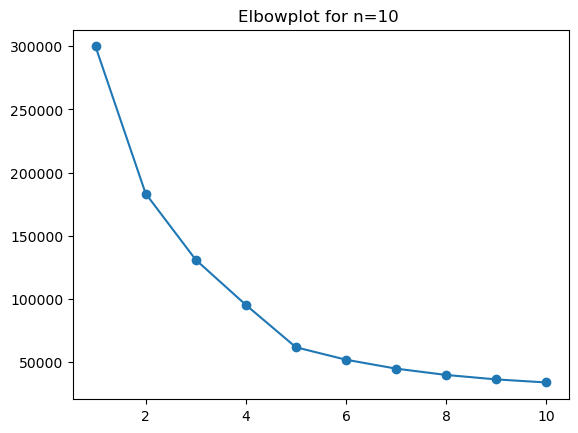

In [107]:
plt.title("Elbowplot for n=10 ")
plt.plot(a,wss, marker = 'o')

In [108]:
from sklearn.metrics import silhouette_samples, silhouette_score


In [109]:
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:
    
    # initialize K means
    kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dfscaled)
    cluster_labels=kmeans.labels_
    #Silhouette Score
    silhouette_avg = silhouette_score(dfscaled,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.38572769619101116
For n_clusters=3, the silhouette score is 0.3825486036570086
For n_clusters=4, the silhouette score is 0.4453451924764985
For n_clusters=5, the silhouette score is 0.5240956940501847
For n_clusters=6, the silhouette score is 0.5221533662938651
For n_clusters=7, the silhouette score is 0.5165635029478534
For n_clusters=8, the silhouette score is 0.4797602766868688
For n_clusters=9, the silhouette score is 0.4319034605175055
For n_clusters=10, the silhouette score is 0.4363498561051042


### For k=5 the silhotte score is maximum

so we will take 5 clusters

In [112]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(dfscaled)
labels = k_means.labels_
silhouette_score(dfscaled,labels,random_state=1)

0.5240956940501847

In [113]:
df_num["Clus_kmeans5"] = labels
df_num.head()



Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0        300.0      250.0  75000.0                 1806.0            325.0   
1        300.0      250.0  75000.0                 1780.0            285.0   
2        300.0      250.0  75000.0                 2727.0            356.0   
3        300.0      250.0  75000.0                 2430.0            497.0   
4        300.0      250.0  75000.0                 1218.0            242.0   

   Impressions  Clicks  Spend   Fee  Revenue  CTR  CPM       CPC  Clus_kmeans5  
0        323.0     1.0    0.0  0.35      0.0  0.0  0.0  0.309598             0  
1        285.0     1.0    0.0  0.35      0.0  0.0  0.0  0.350877             0  
2        355.0     1.0    0.0  0.35      0.0  0.0  0.0  0.281690             0  
3        495.0     1.0    0.0  0.35      0.0  0.0  0.0  0.202020             0  
4        242.0     1.0    0.0  0.35      0.0  0.0  0.0  0.413223             0

In [114]:
df_num.Clus_kmeans5.value_counts().sort_index()

Clus_kmeans5
0    6275
1    4676
2    6524
3    4054
4    1537
Name: count, dtype: int64

In [115]:
clust_profile=df_num.groupby('Clus_kmeans5').mean().round(2)
clust_profile['freq']=df_num.Clus_kmeans5.value_counts().sort_index()
clust_profile

Ad - Length  Ad- Width    Ad Size  Available_Impressions  \
Clus_kmeans5                                                             
0                  421.70     152.00   64300.00             1810314.07   
1                  683.83     303.79  100775.88              251346.51   
2                  143.28     572.10   73966.74               32093.56   
3                  465.78     199.15   72963.94             5695404.59   
4                  141.45     572.45   73686.40              806328.42   

              Matched_Queries  Impressions    Clicks    Spend   Fee  Revenue  \
Clus_kmeans5                                                                   
0                   864262.34    826220.93   3263.13  1500.09  0.35   977.42   
1                   137550.91    116771.36  14127.28  1252.29  0.35   815.54   
2                    19624.06     13492.04   1914.45   209.16  0.35   135.99   
3                  2806219.21   2671267.53  11245.75  5739.33  0.31  3878.75   
4                   566864.05    478148.52  30572.44  6546.37  0.31  4471.78   

               CTR    CPM    CPC  freq  
Clus_kmeans5                            
0             0.53   1.79   0.40  6275  
1             0.09  11.73  13.29  4676  
2             0.10  14.33  15.78  6524  
3             0.75   1.57   0.22  4054  
4             0.11  15.39  13.75  1537

## Business Recommendations
Extract meaningful insights (atleast 3) from the clusters to identify the most effective types of ads, 
target audiences, or marketing strategies that can be inferred from each segment. -

Based on the clustering analysis and key insights, provide actionable recommendations (atleast 3) to Ads24x7 on 
how to optimize their digital marketing efforts, 
allocate budgets efficiently, and 
tailor ad content to specific audience segments.


In [116]:
df_cat = df.select_dtypes(include = ['object'])


In [117]:
df_cat.head()

Timestamp InventoryType   Ad Type Platform Device Type   Format
0  2020-9-2-17       Format1  Inter222    Video     Desktop  Display
1  2020-9-2-10       Format1  Inter227      App      Mobile    Video
2  2020-9-1-22       Format1  Inter222    Video     Desktop  Display
3  2020-9-3-20       Format1  Inter228    Video      Mobile    Video
4  2020-9-4-15       Format1  Inter217      Web     Desktop    Video

In [118]:
df_num.head()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0        300.0      250.0  75000.0                 1806.0            325.0   
1        300.0      250.0  75000.0                 1780.0            285.0   
2        300.0      250.0  75000.0                 2727.0            356.0   
3        300.0      250.0  75000.0                 2430.0            497.0   
4        300.0      250.0  75000.0                 1218.0            242.0   

   Impressions  Clicks  Spend   Fee  Revenue  CTR  CPM       CPC  Clus_kmeans5  
0        323.0     1.0    0.0  0.35      0.0  0.0  0.0  0.309598             0  
1        285.0     1.0    0.0  0.35      0.0  0.0  0.0  0.350877             0  
2        355.0     1.0    0.0  0.35      0.0  0.0  0.0  0.281690             0  
3        495.0     1.0    0.0  0.35      0.0  0.0  0.0  0.202020             0  
4        242.0     1.0    0.0  0.35      0.0  0.0  0.0  0.413223             0

In [119]:
DF= pd.concat([df_cat, df_num],axis =1)

In [120]:
DF

Timestamp InventoryType   Ad Type Platform Device Type   Format  \
0       2020-9-2-17       Format1  Inter222    Video     Desktop  Display   
1       2020-9-2-10       Format1  Inter227      App      Mobile    Video   
2       2020-9-1-22       Format1  Inter222    Video     Desktop  Display   
3       2020-9-3-20       Format1  Inter228    Video      Mobile    Video   
4       2020-9-4-15       Format1  Inter217      Web     Desktop    Video   
...             ...           ...       ...      ...         ...      ...   
23061   2020-9-13-7       Format5  Inter220      Web      Mobile    Video   
23062   2020-11-2-7       Format5  Inter224      Web     Desktop    Video   
23063  2020-9-14-22       Format5  Inter218      App      Mobile    Video   
23064  2020-11-18-2       Format4  inter230    Video      Mobile    Video   
23065   2020-9-14-0       Format5  Inter221      App      Mobile    Video   

       Ad - Length  Ad- Width   Ad Size  Available_Impressions  \
0            300.0      250.0   75000.0                 1806.0   
1            300.0      250.0   75000.0                 1780.0   
2            300.0      250.0   75000.0                 2727.0   
3            300.0      250.0   75000.0                 2430.0   
4            300.0      250.0   75000.0                 1218.0   
...            ...        ...       ...                    ...   
23061        720.0      300.0  102000.0                    1.0   
23062        720.0      300.0  102000.0                    3.0   
23063        720.0      300.0  102000.0                    2.0   
23064        120.0      600.0   72000.0                    7.0   
23065        720.0      300.0  102000.0                    2.0   

       Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue   CTR  \
0                325.0        323.0     1.0   0.00  0.35   0.0000  0.00   
1                285.0        285.0     1.0   0.00  0.35   0.0000  0.00   
2                356.0        355.0     1.0   0.00  0.35   0.0000  0.00   
3                497.0        495.0     1.0   0.00  0.35   0.0000  0.00   
4                242.0        242.0     1.0   0.00  0.35   0.0000  0.00   
...                ...          ...     ...    ...   ...      ...   ...   
23061              1.0          1.0     1.0   0.07  0.35   0.0455  0.07   
23062              2.0          2.0     1.0   0.04  0.35   0.0260  0.04   
23063              1.0          1.0     1.0   0.05  0.35   0.0325  0.05   
23064              1.0          1.0     1.0   0.07  0.35   0.0455  0.07   
23065              2.0          2.0     1.0   0.09  0.35   0.0585  0.09   

             CPM        CPC  Clus_kmeans5  
0       0.000000   0.309598             0  
1       0.000000   0.350877             0  
2       0.000000   0.281690             0  
3       0.000000   0.202020             0  
4       0.000000   0.413223             0  
...          ...        ...           ...  
23061  29.981418  33.278766             1  
23062  20.000000  33.278766             1  
23063  29.981418  33.278766             1  
23064  29.981418  33.278766             2  
23065  29.981418  33.278766             1  

[23066 rows x 20 columns]

In [125]:
DF.to_excel('C:/Users/user/Desktop/PGDSBA/Machine Learning 1/ADSProject Clustering.xlsx')

# PROBLEM STATEMENT 2
Problem Definition - Check shape, Data types, statistical summary - 

Perform an EDA on the data to extract useful insights

Note: 

1. Pick 5 variables out of the given 24 variables below for EDA: 
No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F 

2. Example questions to answer from EDA - 

(i) Which state has highest gender ratio and which has the lowest? 

(ii) Which district has the highest & lowest gender ratio?

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from factor_analyzer import FactorAnalyzer 
import warnings
warnings.filterwarnings("ignore")

In [5]:
data=pd.read_excel("C:/Users/user/Desktop/PGDSBA/Machine Learning 1/ML1 Project/PCA+India+Data_Census.xlsx")

In [6]:
data.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [7]:
data.shape

(640, 61)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [9]:
data.describe()

State Code   Dist.Code          No_HH          TOT_M          TOT_F  \
count  640.000000  640.000000     640.000000     640.000000     640.000000   
mean    17.114062  320.500000   51222.871875   79940.576563  122372.084375   
std      9.426486  184.896367   48135.405475   73384.511114  113600.717282   
min      1.000000    1.000000     350.000000     391.000000     698.000000   
25%      9.000000  160.750000   19484.000000   30228.000000   46517.750000   
50%     18.000000  320.500000   35837.000000   58339.000000   87724.500000   
75%     24.000000  480.250000   68892.000000  107918.500000  164251.750000   
max     35.000000  640.000000  310450.000000  485417.000000  750392.000000   

               M_06          F_06           M_SC           F_SC          M_ST  \
count    640.000000    640.000000     640.000000     640.000000    640.000000   
mean   12309.098438  11942.300000   13820.946875   20778.392188   6191.807813   
std    11500.906881  11326.294567   14426.373130   21727.887713   9912.668948   
min       56.000000     56.000000       0.000000       0.000000      0.000000   
25%     4733.750000   4672.250000    3466.250000    5603.250000    293.750000   
50%     9159.000000   8663.000000    9591.500000   13709.000000   2333.500000   
75%    16520.250000  15902.250000   19429.750000   29180.000000   7658.000000   
max    96223.000000  95129.000000  103307.000000  156429.000000  96785.000000   

       ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
count  ...     640.000000     640.000000     640.000000     640.000000   
mean   ...    1392.973438    2757.050000     250.889062     558.098438   
std    ...    1489.707052    2788.776676     453.336594    1117.642748   
min    ...       4.000000      30.000000       0.000000       0.000000   
25%    ...     489.500000     957.250000      47.000000     109.000000   
50%    ...     949.000000    1928.000000     114.500000     247.500000   
75%    ...    1714.000000    3599.750000     270.750000     568.750000   
max    ...    9875.000000   21611.000000    5775.000000   17153.000000   

       MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
count     640.000000     640.000000     640.000000     640.000000   
mean      560.690625    1293.431250      71.379688     200.742188   
std       762.578991    1585.377936     107.897627     309.740854   
min         0.000000       0.000000       0.000000       0.000000   
25%       136.500000     298.000000      14.000000      43.000000   
50%       308.000000     717.000000      35.000000     113.000000   
75%       642.000000    1710.750000      79.000000     240.000000   
max      6116.000000   13714.000000     895.000000    3354.000000   

        NON_WORK_M    NON_WORK_F  
count   640.000000    640.000000  
mean    510.014063    704.778125  
std     610.603187    910.209225  
min       0.000000      5.000000  
25%     161.000000    220.500000  
50%     326.000000    464.500000  
75%     604.500000    853.500000  
max    6456.000000  10533.000000  

[8 rows x 59 columns]

In [10]:
data.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [11]:
data.duplicated().sum()

0

In [127]:
EDA =data[["State","No_HH","TOT_M", "TOT_F","TOT_WORK_M", "TOT_WORK_F"]].groupby('State').sum().sort_values(by = ['No_HH'], ascending=False)
EDA['Sex Ratio']=(EDA['TOT_F']/EDA['TOT_M'])*1000
EDA.sort_values(by = ['Sex Ratio'], ascending=False)

No_HH    TOT_M     TOT_F  TOT_WORK_M  TOT_WORK_F  \
State                                                                          
Andhra Pradesh            3127287  3274363   6097235     1674517     2833719   
Tamil Nadu                2964700  3074009   5610310     1724274     2441679   
Chhattisgarh               734616   838404   1526592      398935      732456   
Arunachal Pradesh           35114    50582     88066       15841       41394   
Odisha                    1202073  1460031   2536980      719629      944044   
Nagaland                    53423    73506    125935       30889       70104   
Maharashtra               3136214  4196130   7138557     2028630     2918694   
Puducherry                  53950    70386    119074       36362       33875   
Kerala                    1982663  2919825   4856357     1318975      917275   
Goa                         79595   118979    191393       63086       50031   
Mizoram                     37069    59534     95463       26953       44552   
Tripura                    120647   160457    256370       83230       91163   
Uttarakhand                392668   613924    973147      236464      349183   
Karnataka                 2268615  3409482   5345675     1932842     2191898   
Madhya Pradesh            1503764  2155608   3369745     1004639     1412107   
Manipur                     83320   145524    226963       66569      105574   
Sikkim                      16690    26664     41518       13608       20161   
Himachal Pradesh           305317   483381    752062      240769      347030   
Dadara & Nagar Havelli       4288     6982     10831        3138        4406   
West Bengal               2615284  3912553   6016118     2187371     1737825   
Andaman & Nicobar Island    13012    18726     28691        9767        8483   
Gujarat                   1235200  1983685   2939472     1057781      918297   
Jharkhand                  681905  1202623   1763884      515473      705175   
Assam                      853374  1437268   2093432      744397      705299   
Rajasthan                 1177124  2062563   2966496      882174     1127286   
Chandigarh                  24016    41753     59644       20774       15789   
Daman & Diu                  7455    13153     18706        6884        4005   
Jammu & Kashmir            203645   421213    572959      168768      129403   
Punjab                     796030  1579405   2121425      786483      386766   
Bihar                     1974627  4025198   5405883     1524553     1464147   
Meghalaya                  126845   268036    356355      116787      149208   
Uttar Pradesh             4006871  9043969  12023885     3710433     2972243   
NCT of Delhi               394821   833414   1075266      427622      206399   
Haryana                    565971  1167816   1498873      531409      347837   
Lakshadweep                  4445    12823     14772        5115        1780   

                            Sex Ratio  
State                                  
Andhra Pradesh            1862.113333  
Tamil Nadu                1825.079237  
Chhattisgarh              1820.831007  
Arunachal Pradesh         1741.054130  
Odisha                    1737.620640  
Nagaland                  1713.261502  
Maharashtra               1701.223985  
Puducherry                1691.728469  
Kerala                    1663.235639  
Goa                       1608.628413  
Mizoram                   1603.503880  
Tripura                   1597.748930  
Uttarakhand               1585.126172  
Karnataka                 1567.884799  
Madhya Pradesh            1563.245729  
Manipur                   1559.625904  
Sikkim                    1557.080708  
Himachal Pradesh          1555.836907  
Dadara & Nagar Havelli    1551.274706  
West Bengal               1537.645113  
Andaman & Nicobar Island  1532.147816  
Gujarat                   1481.823979  
Jharkhand                 1466.697377  
Assam                     1456.535594  
Rajasthan                 1

No_HH
Skew : 1.24


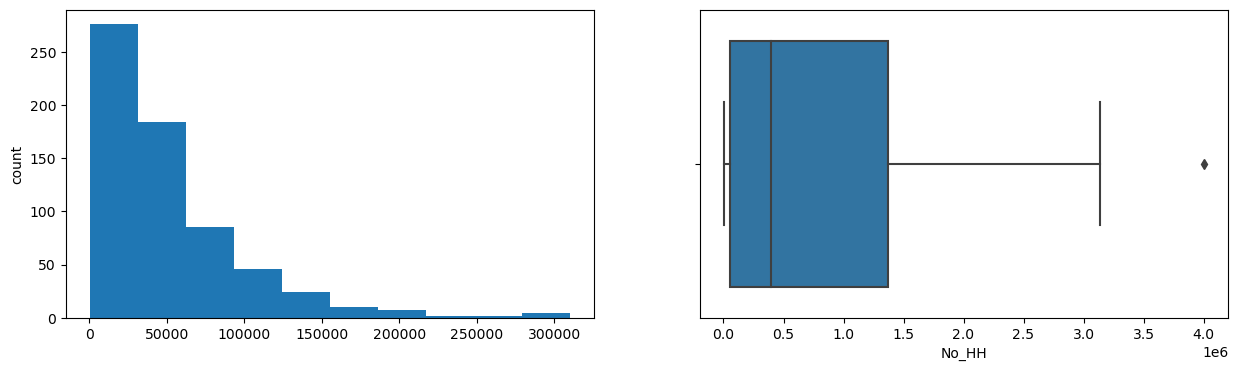

TOT_M
Skew : 2.17


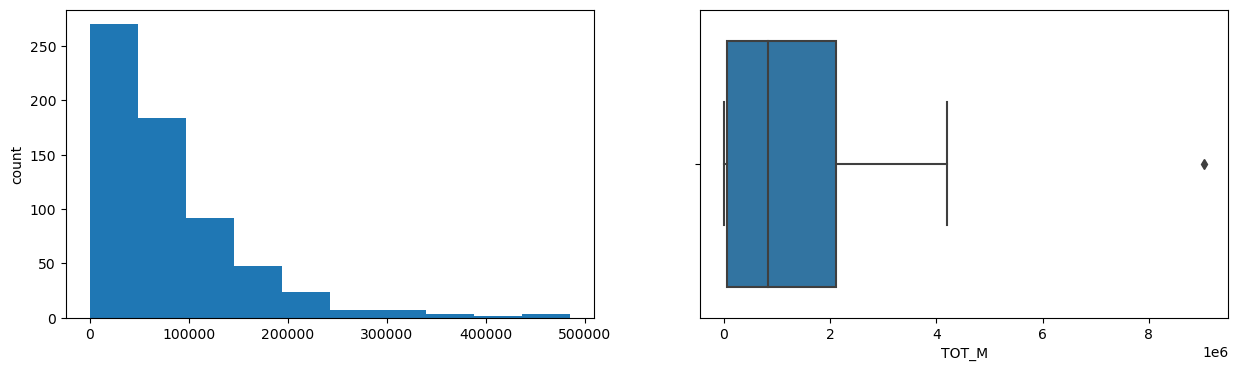

TOT_F
Skew : 1.67


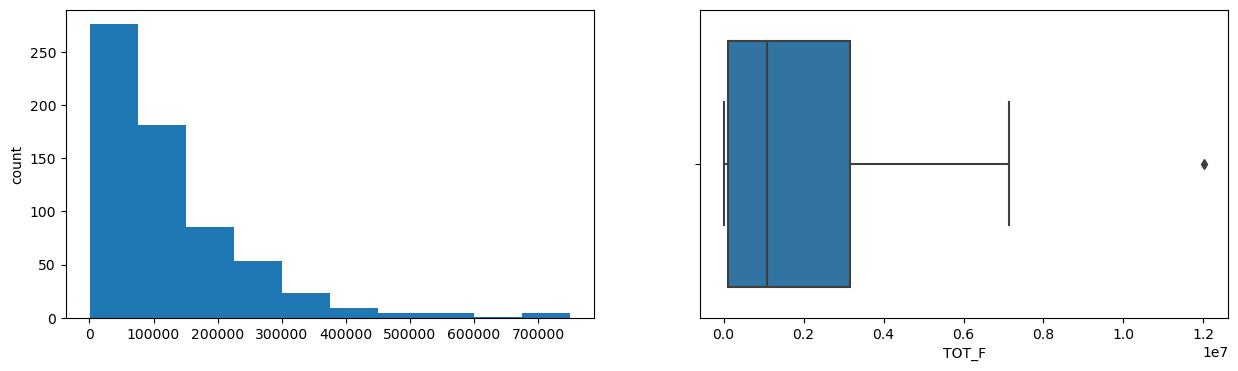

TOT_WORK_M
Skew : 1.66


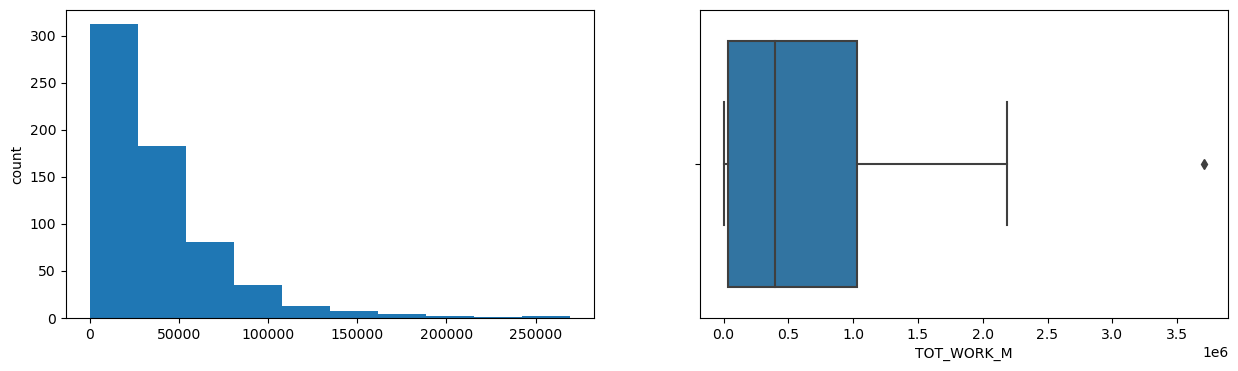

TOT_WORK_F
Skew : 1.31


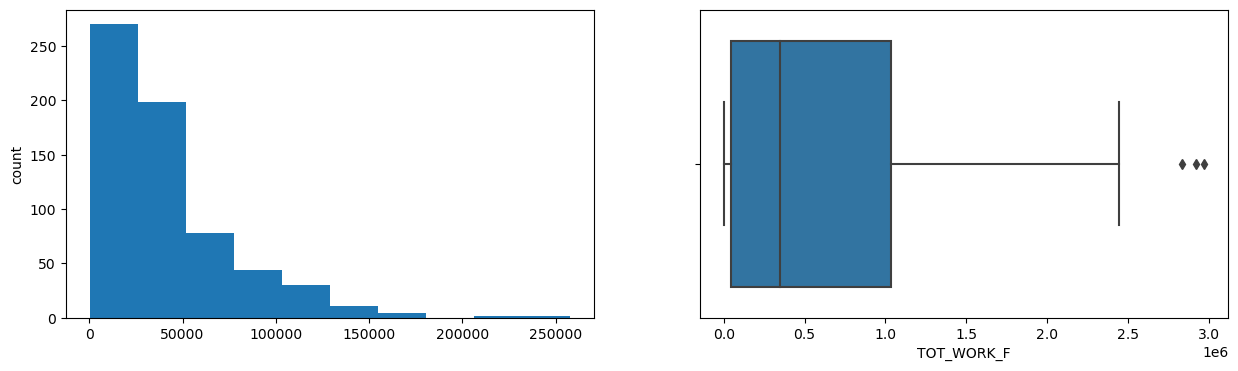

Sex Ratio
Skew : -0.06


KeyError: 'Sex Ratio'

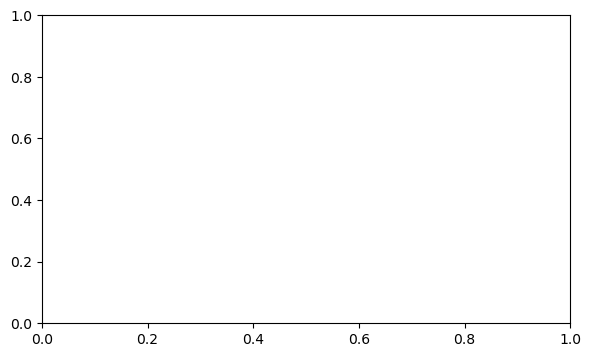

In [128]:
for col in EDA.columns:
    print(col)
    print('Skew :',round(EDA[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=EDA[col])
    plt.show()

Which State has Highest literate population maong male and female?	M_LIT F_LIT

Which state has Lowest Total Worker Population among men?	

Which state has highest Non-working population among male and female?	

Which district has highest Scheduled caste population among male?	

Which District and state has lowest number of households?	



In [13]:
data.head(5)

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

Part 2: PCA: Data Preprocessing
- Check for and treat (if needed) missing values - Check for and treat (if needed) data irregularities - Scale the Data using the z-score method - Visualize the data before and after scaling and comment on the impact on outliers


In [14]:
data.info()
#no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [15]:
data_cat = data.select_dtypes(include = ['object'])
data_numb = data.select_dtypes(include = ['float64', 'int64'])
data_num=data_numb.drop(['State Code','Dist.Code'],axis=1)

lstnumericcolumns = list(data_num.columns.values)
len(lstnumericcolumns)

57

In [16]:
lstnumericcolumns

['No_HH',
 'TOT_M',
 'TOT_F',
 'M_06',
 'F_06',
 'M_SC',
 'F_SC',
 'M_ST',
 'F_ST',
 'M_LIT',
 'F_LIT',
 'M_ILL',
 'F_ILL',
 'TOT_WORK_M',
 'TOT_WORK_F',
 'MAINWORK_M',
 'MAINWORK_F',
 'MAIN_CL_M',
 'MAIN_CL_F',
 'MAIN_AL_M',
 'MAIN_AL_F',
 'MAIN_HH_M',
 'MAIN_HH_F',
 'MAIN_OT_M',
 'MAIN_OT_F',
 'MARGWORK_M',
 'MARGWORK_F',
 'MARG_CL_M',
 'MARG_CL_F',
 'MARG_AL_M',
 'MARG_AL_F',
 'MARG_HH_M',
 'MARG_HH_F',
 'MARG_OT_M',
 'MARG_OT_F',
 'MARGWORK_3_6_M',
 'MARGWORK_3_6_F',
 'MARG_CL_3_6_M',
 'MARG_CL_3_6_F',
 'MARG_AL_3_6_M',
 'MARG_AL_3_6_F',
 'MARG_HH_3_6_M',
 'MARG_HH_3_6_F',
 'MARG_OT_3_6_M',
 'MARG_OT_3_6_F',
 'MARGWORK_0_3_M',
 'MARGWORK_0_3_F',
 'MARG_CL_0_3_M',
 'MARG_CL_0_3_F',
 'MARG_AL_0_3_M',
 'MARG_AL_0_3_F',
 'MARG_HH_0_3_M',
 'MARG_HH_0_3_F',
 'MARG_OT_0_3_M',
 'MARG_OT_0_3_F',
 'NON_WORK_M',
 'NON_WORK_F']

ValueError: num must be an integer with 1 <= num <= 50, not 51

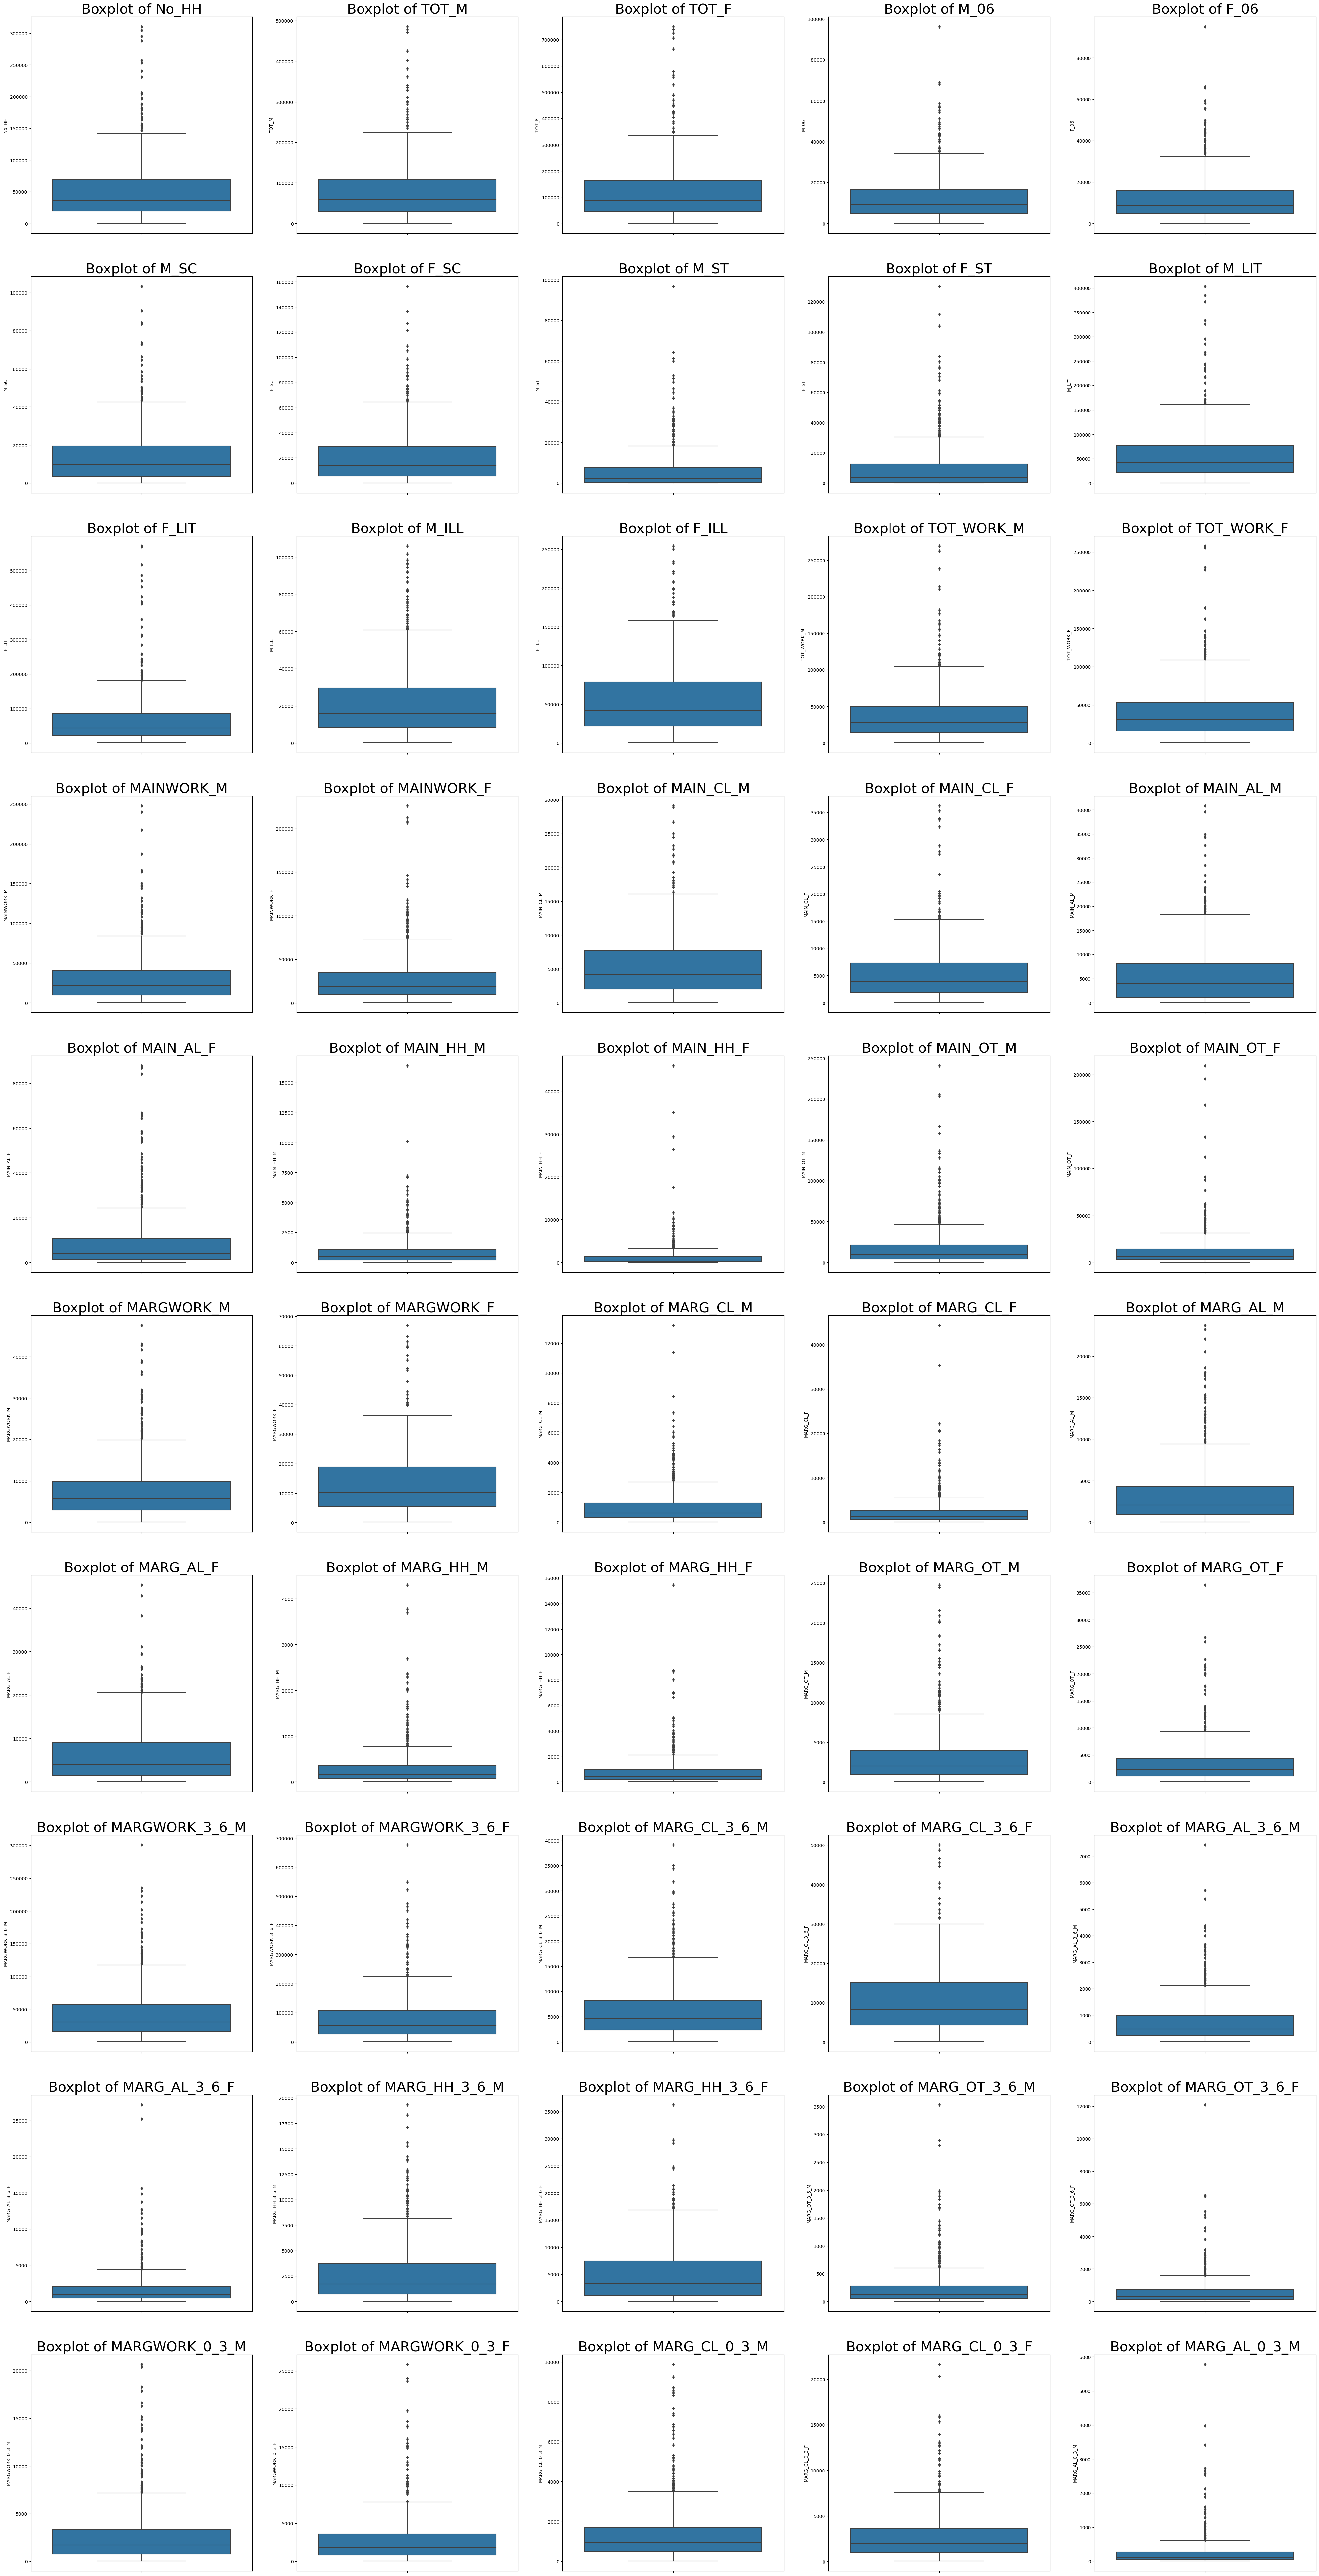

In [17]:
#Checkagain if outliers are present
plt.figure(figsize = (50,100))
feature_list = data_num.columns
for i in range(len(feature_list)):
    plt.subplot(10, 5, i + 1)
    sns.boxplot(y = data_num[feature_list[i]], data = data_num)
    plt.title('Boxplot of {}'.format(feature_list[i]), fontsize =30)
    

In [18]:
#define function that returns upper an dlower limit to detect outliers for each feature
def remove_outliers(col):
    q1,q3 =col.quantile([0.25,0.75])
    IQR =q3-q1
    lower_range =q1-(1.5*IQR)
    upper_range = q3 + (1.5*IQR)
    
    return lower_range, upper_range
#cap and floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL =remove_outliers(data_num[i])
    data_num[i]=np.where(data_num[i]>UL,UL,data_num[i])
    data_num[i]=np.where(data_num[i]<LL,LL,data_num[i])
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No_HH           640 non-null    float64
 1   TOT_M           640 non-null    float64
 2   TOT_F           640 non-null    float64
 3   M_06            640 non-null    float64
 4   F_06            640 non-null    float64
 5   M_SC            640 non-null    float64
 6   F_SC            640 non-null    float64
 7   M_ST            640 non-null    float64
 8   F_ST            640 non-null    float64
 9   M_LIT           640 non-null    float64
 10  F_LIT           640 non-null    float64
 11  M_ILL           640 non-null    float64
 12  F_ILL           640 non-null    float64
 13  TOT_WORK_M      640 non-null    float64
 14  TOT_WORK_F      640 non-null    float64
 15  MAINWORK_M      640 non-null    float64
 16  MAINWORK_F      640 non-null    float64
 17  MAIN_CL_M       640 non-null    flo

ValueError: num must be an integer with 1 <= num <= 50, not 51

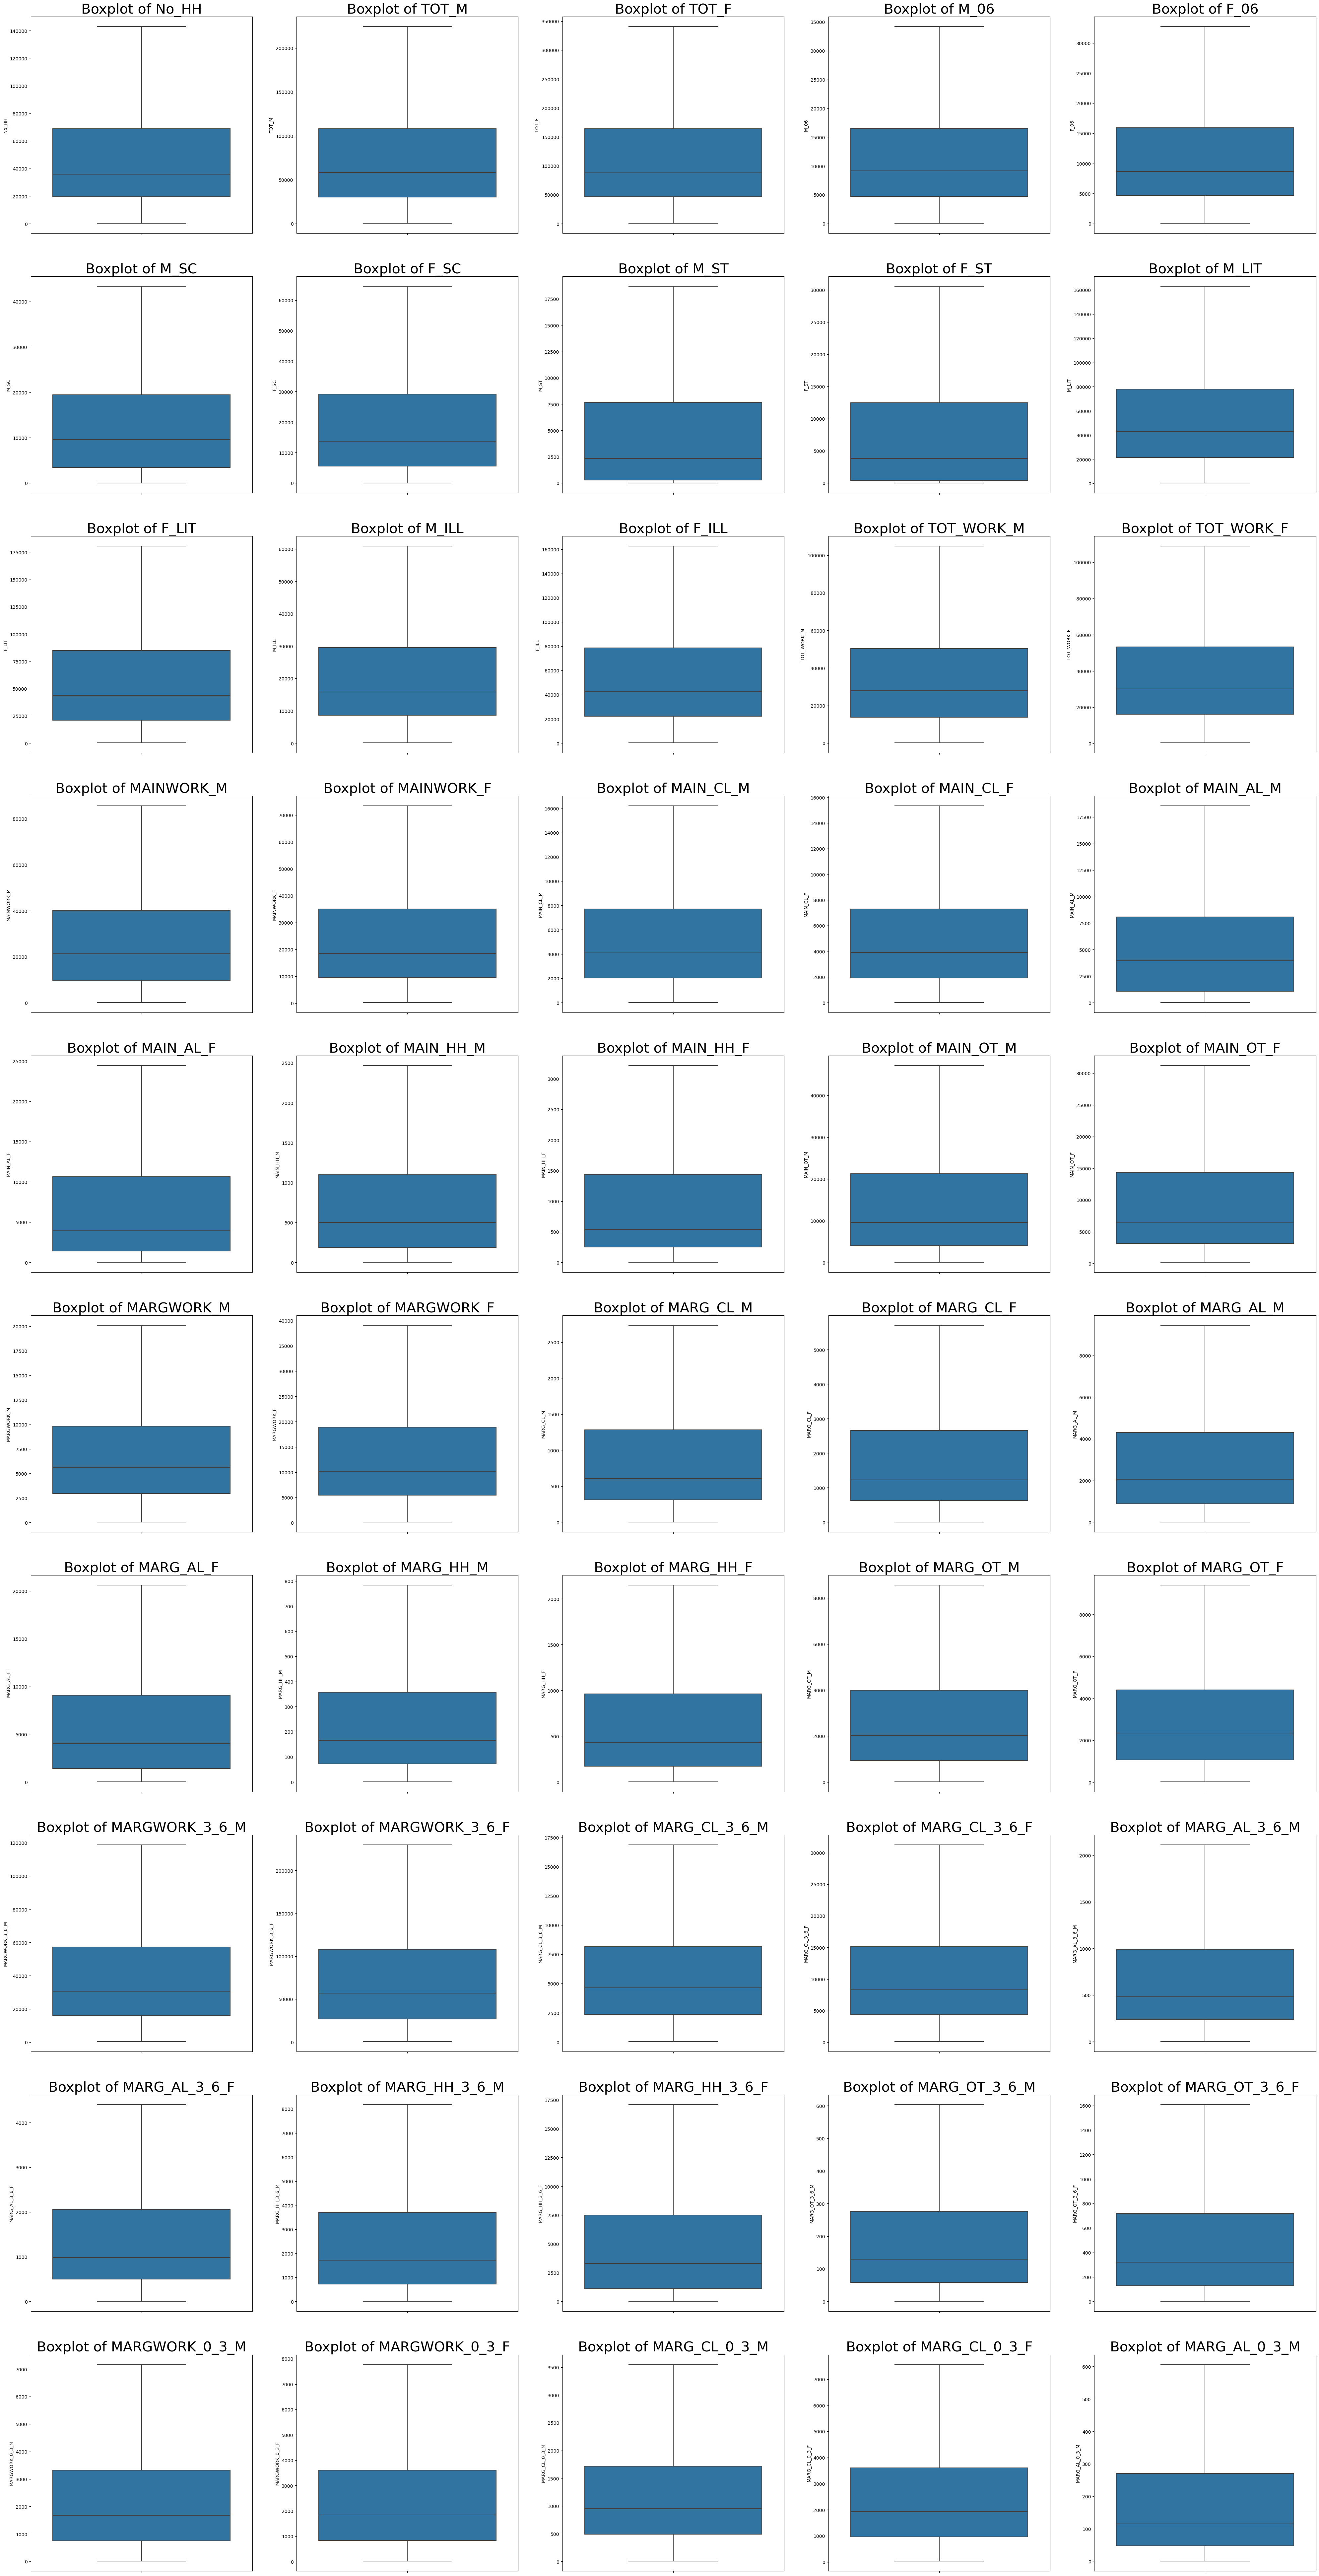

In [19]:
#Checkagain if outliers are present
plt.figure(figsize = (50,100))
feature_list = data_num.columns
for i in range(len(feature_list)):
    plt.subplot(10, 5, i + 1)
    sns.boxplot(y = data_num[feature_list[i]], data = data_num)
    plt.title('Boxplot of {}'.format(feature_list[i]), fontsize =30)

In [20]:
# we will do scaling of the data

from scipy.stats import zscore
datascaled =data_num.apply(zscore)

In [21]:
datascaled.head()

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0 -1.038986 -0.874837 -0.937027 -0.624685 -0.561282 -1.080201 -1.079963   
1 -1.076896 -0.938023 -1.009723 -0.773932 -0.835657 -1.079873 -1.079635   
2 -1.121858 -1.154665 -1.141539 -1.141642 -1.138104 -1.080201 -1.079635   
3 -1.201599 -1.217171 -1.214930 -1.197772 -1.176091 -1.080447 -1.079963   
4 -0.938495 -0.921309 -0.935018 -0.700931 -0.740523 -1.078807 -1.078160   

       M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0 -0.510440 -0.574198 -0.939617  ...      -0.093587      -0.860882   
1 -0.771833 -0.782092 -1.005083  ...      -0.719169      -0.877096   
2  0.122588  0.137599 -1.141561  ...      -1.130551      -1.128423   
3 -0.399531 -0.437333 -1.203009  ...      -1.050477      -1.100286   
4  0.432534  0.249489 -0.942767  ...      -0.369844      -0.298617   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0      -0.041800      -0.423378       0.523468      -0.793688      -0.443385   
1      -0.347040      -0.443790      -0.634478      -0.884805       0.358782   
2      -0.770091      -0.800999      -1.063434      -0.984684      -1.026779   
3      -0.679055      -0.701491      -1.039994      -0.970666      -0.953855   
4       1.484398       1.633130      -0.589942      -0.749882      -0.589234   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0      -0.756991   -0.497493   -0.774865  
1       0.088391   -0.813235   -0.880662  
2      -1.025976   -1.008568   -1.074622  
3      -0.987550   -0.877454   -1.078541  
4      -0.379131   -0.706204   -0.257637  

[5 rows x 57 columns]

In [22]:
datascaled.describe().round(2)

No_HH   TOT_M   TOT_F    M_06    F_06    M_SC    F_SC    M_ST    F_ST  \
count  640.00  640.00  640.00  640.00  640.00  640.00  640.00  640.00  640.00   
mean    -0.00   -0.00   -0.00    0.00   -0.00    0.00   -0.00   -0.00    0.00   
std      1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00   
min     -1.23   -1.26   -1.25   -1.25   -1.25   -1.08   -1.08   -0.84   -0.83   
25%     -0.74   -0.76   -0.76   -0.75   -0.73   -0.80   -0.77   -0.79   -0.79   
50%     -0.32   -0.29   -0.31   -0.27   -0.29   -0.29   -0.33   -0.45   -0.45   
75%      0.52    0.53    0.52    0.53    0.52    0.51    0.51    0.43    0.41   
max      2.41    2.47    2.44    2.44    2.40    2.48    2.45    2.27    2.22   

        M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
count  640.00  ...         640.00         640.00         640.00   
mean    -0.00  ...          -0.00          -0.00          -0.00   
std      1.00  ...           1.00           1.00           1.00   
min     -1.24  ...          -1.24          -1.20          -1.01   
25%     -0.76  ...          -0.75          -0.76          -0.75   
50%     -0.27  ...          -0.29          -0.30          -0.39   
75%      0.54  ...           0.47           0.50           0.44   
max      2.48  ...           2.31           2.39           2.24   

       MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
count         640.00         640.00         640.00         640.00   
mean           -0.00           0.00           0.00          -0.00   
std             1.00           1.00           1.00           1.00   
min            -1.03          -1.07          -1.01          -1.03   
25%            -0.75          -0.75          -0.75          -0.77   
50%            -0.40          -0.35          -0.39          -0.39   
75%             0.42           0.43           0.48           0.41   
max             2.18           2.21           2.34           2.19   

       MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
count         640.00      640.00      640.00  
mean           -0.00       -0.00        0.00  
std             1.00        1.00        1.00  
min            -1.05       -1.19       -1.18  
25%            -0.78       -0.76       -0.76  
50%            -0.33       -0.32       -0.28  
75%             0.49        0.43        0.48  
max             2.38        2.21        2.34  

[8 rows x 57 columns]

ValueError: num must be an integer with 1 <= num <= 50, not 51

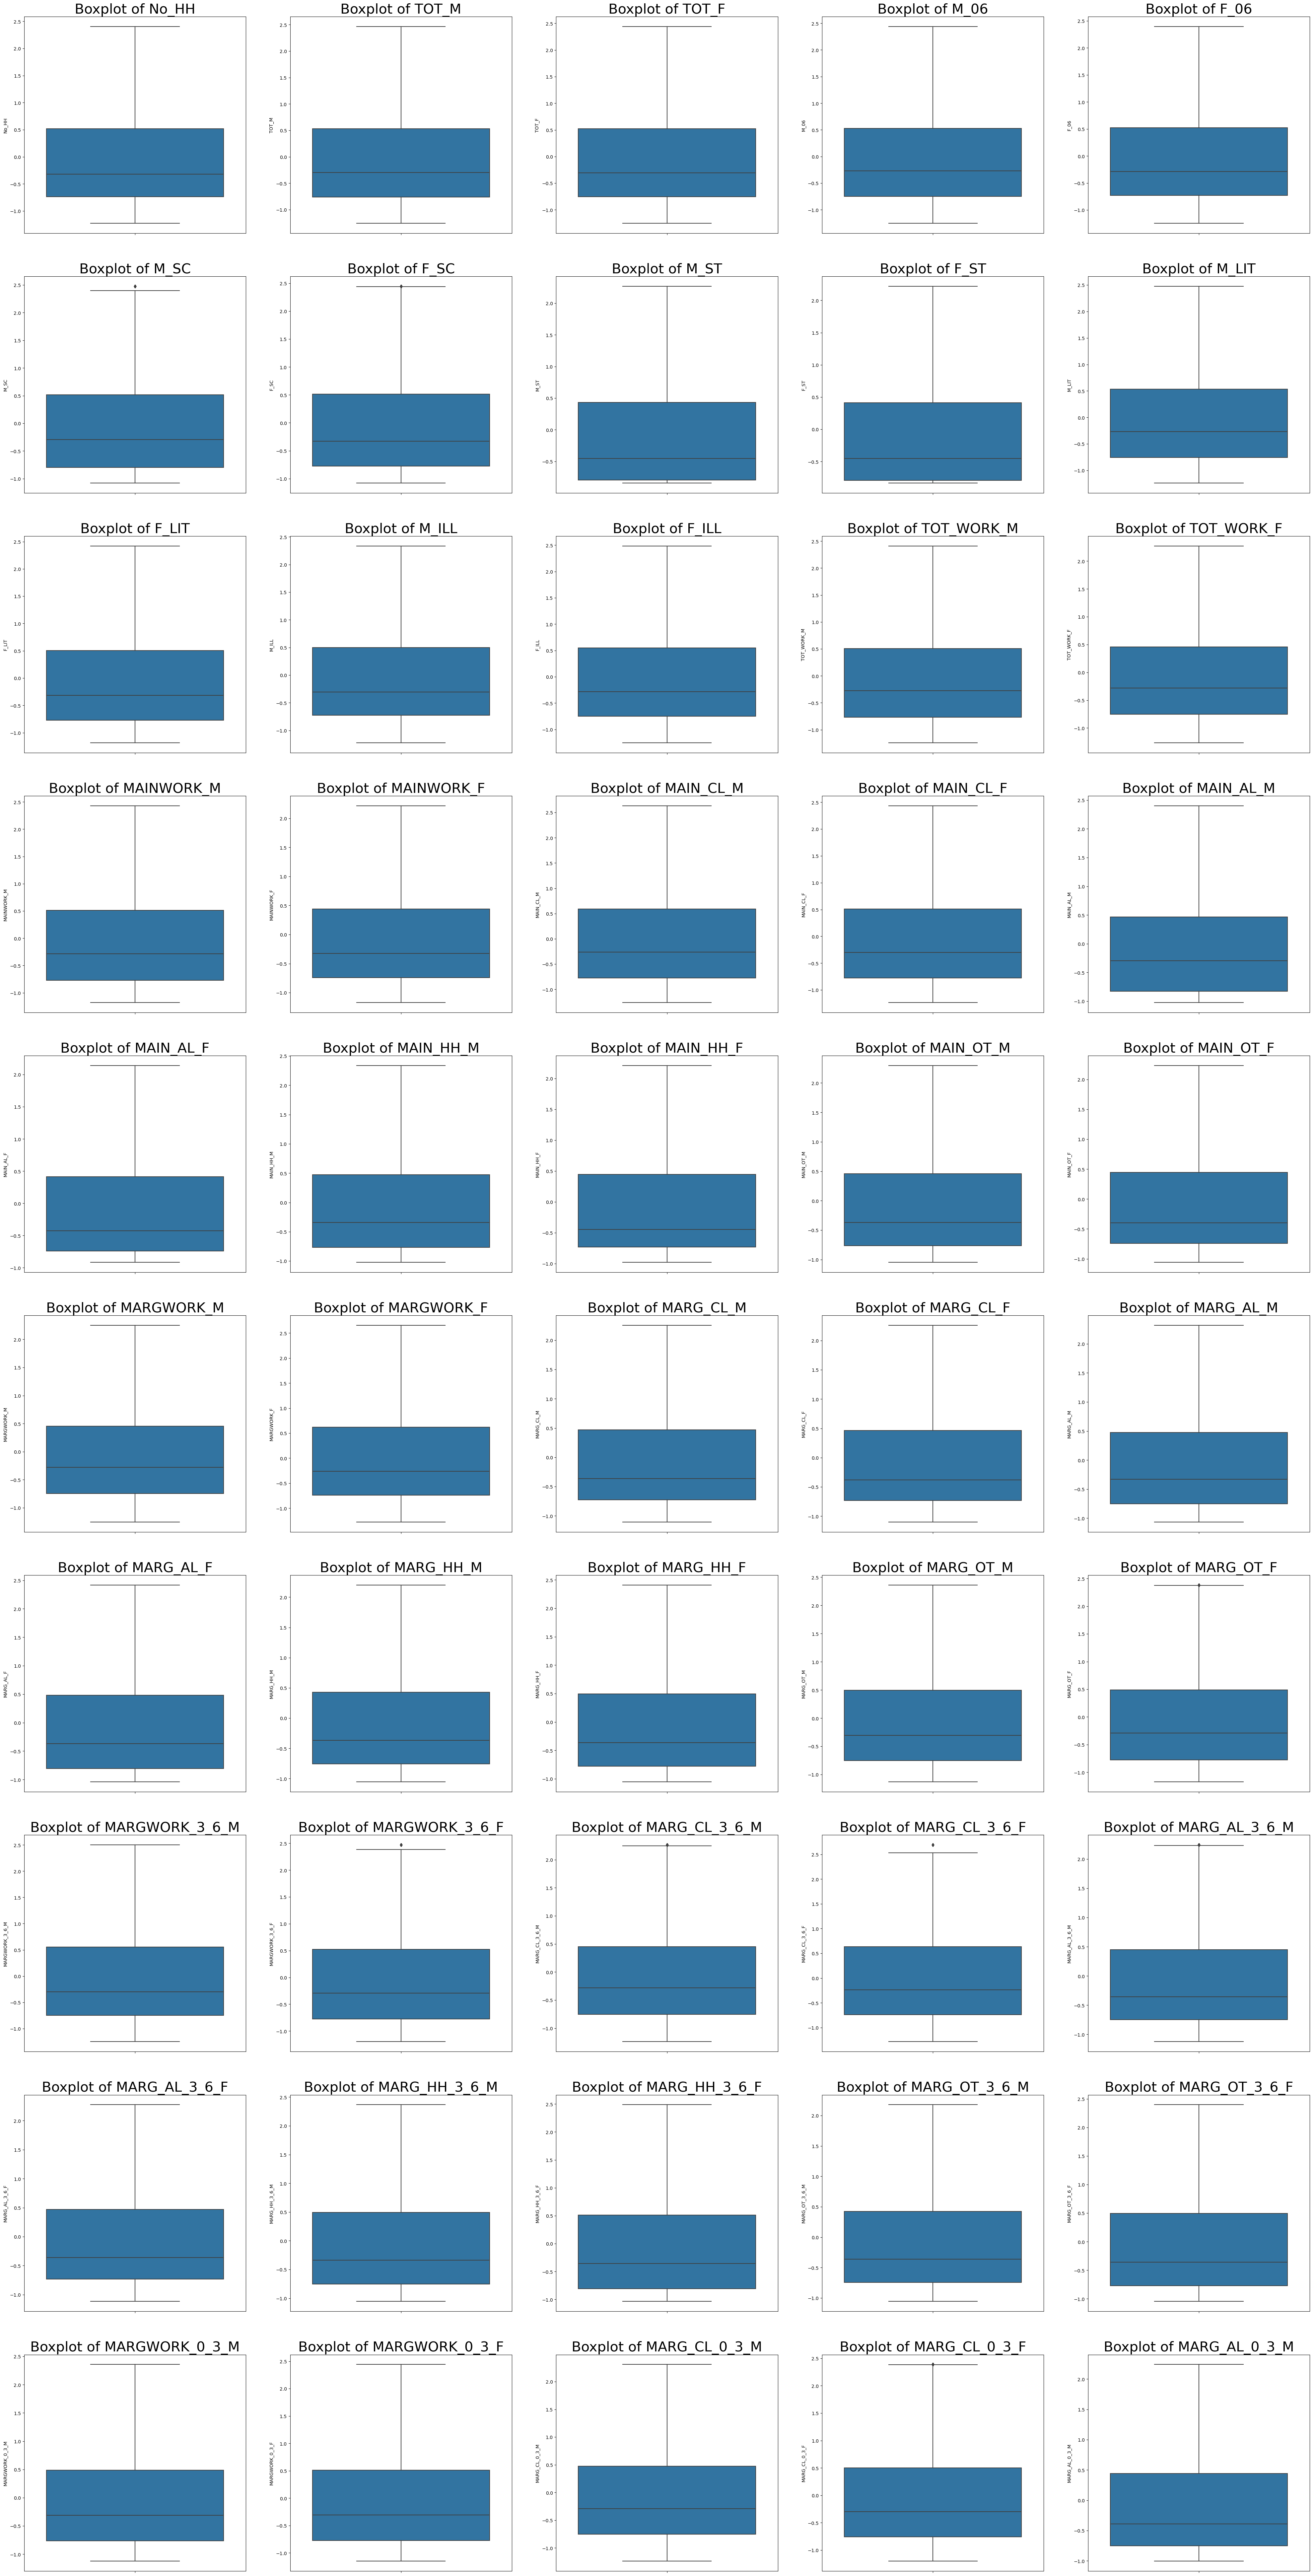

In [23]:
#Checkagain if outliers are present
plt.figure(figsize = (50,100))
feature_list = datascaled.columns
for i in range(len(feature_list)):
    plt.subplot(10, 5, i + 1)
    sns.boxplot(y = datascaled[feature_list[i]], data = datascaled)
    plt.title('Boxplot of {}'.format(feature_list[i]), fontsize =30)

## Part 2; PCA: PCA
- Create the covariance matrix 
- Get eigen values and eigen vectors 
- Identify the optimum number of PCs 
- Show Scree plot 
- Compare PCs with Actual Columns and identify which is explaining most variance 
- Write inferences about all the PCs in terms of actual variables 
- Write linear equation for first PC Note: For the scope of this project, take at least 90% explained variance.


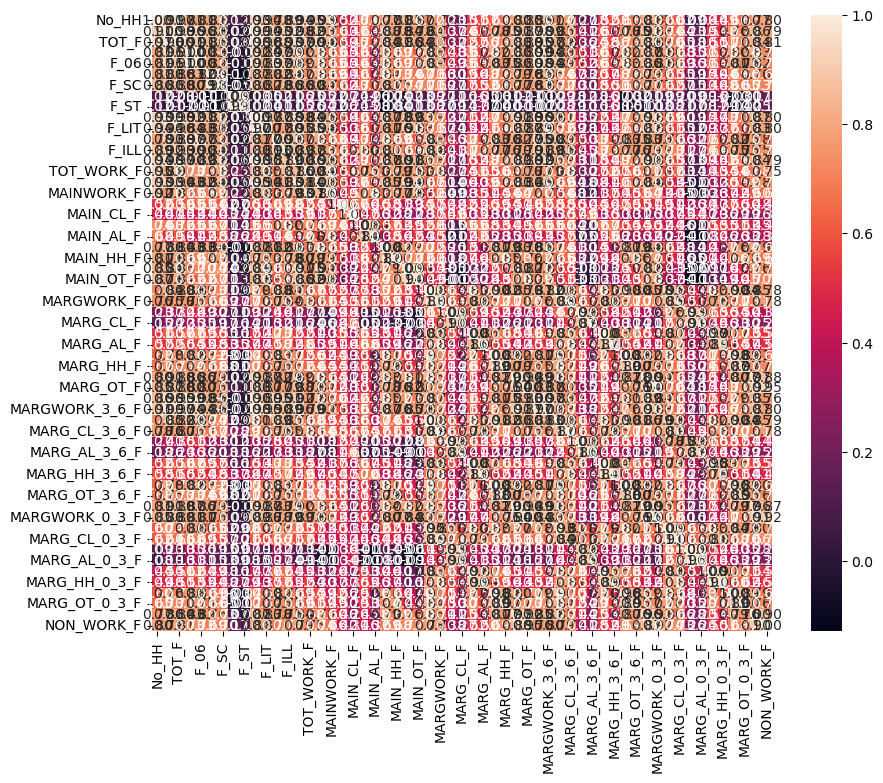

In [551]:
#check for presence of correlations
plt.figure(figsize=(10,8))
sns.heatmap(datascaled.corr(), annot=True, fmt='.2f');

In [ ]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(datascaled)
p_value

In [ ]:
#Confirm the adequacy of sample size using KMO test
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(datascaled)
kmo_model

In [ ]:
datascaled.head()

In [ ]:
#Find new variance-covariance matrix of the transformed variables 
datascaled.cov()

In [24]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=57, random_state=123)
pca_transformed = pca.fit_transform(datascaled)
pca_transformed.round(2)

array([[-5.53,  0.43, -1.47, ...,  0.01,  0.  ,  0.  ],
       [-5.49, -0.11, -2.02, ..., -0.  ,  0.01, -0.01],
       [-7.47, -0.22, -0.25, ..., -0.  , -0.  ,  0.  ],
       ...,
       [-7.89, -1.  , -0.91, ..., -0.  ,  0.  , -0.  ],
       [-7.86, -1.  , -0.85, ..., -0.  , -0.  ,  0.  ],
       [-7.42, -1.41, -0.87, ..., -0.  , -0.  ,  0.  ]])

In [25]:
#Extract eigen vectors
pca.components_

array([[ 0.14922158,  0.15916917,  0.15820921, ...,  0.14136961,
         0.14762899,  0.14210263],
       [-0.11548673, -0.08023879, -0.09371751, ...,  0.03510934,
        -0.04912234, -0.03984815],
       [ 0.1015276 , -0.03866173,  0.0289595 , ..., -0.10217491,
        -0.12667281, -0.02854464],
       ...,
       [ 0.00112879, -0.00673066,  0.02298648, ..., -0.01159627,
         0.05608352, -0.00610478],
       [ 0.00070908,  0.04637872,  0.00402434, ...,  0.01406358,
        -0.07729171, -0.00056173],
       [-0.00461221, -0.00370327,  0.00963954, ...,  0.00227908,
         0.00539901,  0.00130606]])

In [26]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([3.56488638e+01, 7.64357559e+00, 3.76919551e+00, 2.77722349e+00,
       1.90694892e+00, 1.15490310e+00, 9.87726707e-01, 4.64629906e-01,
       3.96708513e-01, 3.22346888e-01, 2.73207369e-01, 2.35647574e-01,
       1.81401107e-01, 1.69243770e-01, 1.38592325e-01, 1.31505852e-01,
       1.03809666e-01, 9.55333831e-02, 8.58580407e-02, 8.09138742e-02,
       6.60179067e-02, 6.30797999e-02, 4.82756124e-02, 4.59506197e-02,
       4.37747566e-02, 3.19339710e-02, 2.86194563e-02, 2.75481445e-02,
       2.34340044e-02, 2.20296816e-02, 1.87487040e-02, 1.59004895e-02,
       1.39957919e-02, 1.18916465e-02, 1.11133495e-02, 9.07842645e-03,
       7.25127869e-03, 6.27213692e-03, 4.95541908e-03, 4.60667097e-03,
       3.45902033e-03, 2.18408510e-03, 2.13514664e-03, 1.92111328e-03,
       1.43840980e-03, 1.09968912e-03, 9.65752052e-04, 8.62630267e-04,
       6.51634478e-04, 5.76658846e-04, 4.35790607e-04, 3.70037468e-04,
       3.06660171e-04, 2.07854170e-04, 1.38286484e-04, 8.97034441e-05,
      

In [27]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([6.24441446e-01, 1.33888289e-01, 6.60229147e-02, 4.86470891e-02,
       3.34029704e-02, 2.02297994e-02, 1.73014629e-02, 8.13866529e-03,
       6.94892379e-03, 5.64637229e-03, 4.78562250e-03, 4.12770833e-03,
       3.17750294e-03, 2.96454958e-03, 2.42764517e-03, 2.30351534e-03,
       1.81837655e-03, 1.67340548e-03, 1.50392785e-03, 1.41732362e-03,
       1.15639919e-03, 1.10493400e-03, 8.45617224e-04, 8.04891611e-04,
       7.66778221e-04, 5.59369722e-04, 5.01311201e-04, 4.82545623e-04,
       4.10480504e-04, 3.85881758e-04, 3.28410688e-04, 2.78520087e-04,
       2.45156553e-04, 2.08299401e-04, 1.94666401e-04, 1.59021779e-04,
       1.27016642e-04, 1.09865556e-04, 8.68013375e-05, 8.06925096e-05,
       6.05897475e-05, 3.82574118e-05, 3.74001838e-05, 3.36510796e-05,
       2.51958296e-05, 1.92626466e-05, 1.69165450e-05, 1.51102177e-05,
       1.14143210e-05, 1.01010143e-05, 7.63350323e-06, 6.48174183e-06,
       5.37159674e-06, 3.64086663e-06, 2.42228792e-06, 1.57128566e-06,
      

#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12'],
                                    index = datascaled.columns)

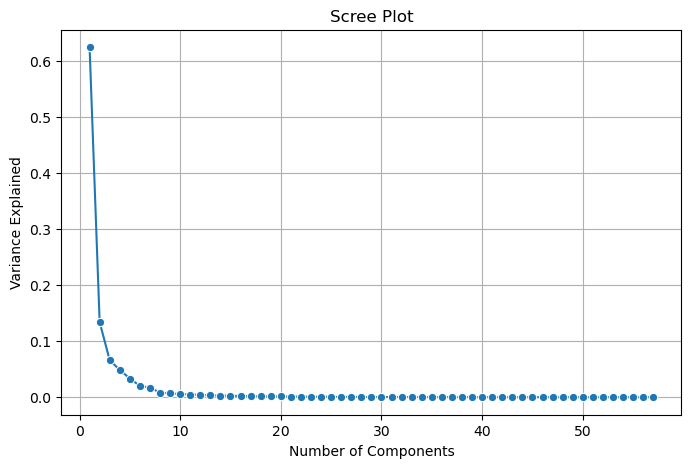

In [28]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,58),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [29]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.62444145, 0.75832974, 0.82435265, 0.87299974, 0.90640271,
       0.92663251, 0.94393397, 0.95207264, 0.95902156, 0.96466793,
       0.96945356, 0.97358126, 0.97675877, 0.97972332, 0.98215096,
       0.98445448, 0.98627285, 0.98794626, 0.98945019, 0.99086751,
       0.99202391, 0.99312884, 0.99397446, 0.99477935, 0.99554613,
       0.9961055 , 0.99660681, 0.99708936, 0.99749984, 0.99788572,
       0.99821413, 0.99849265, 0.99873781, 0.99894611, 0.99914077,
       0.99929979, 0.99942681, 0.99953668, 0.99962348, 0.99970417,
       0.99976476, 0.99980302, 0.99984042, 0.99987407, 0.99989927,
       0.99991853, 0.99993544, 0.99995055, 0.99996197, 0.99997207,
       0.9999797 , 0.99998619, 0.99999156, 0.9999952 , 0.99999762,
       0.99999919, 1.        ])

PC 5 explains 90.6 % of variance

In [30]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, index = datascaled.columns)
df_extracted_loadings.head()                                    

0         1         2         3         4         5         6   \
No_HH  0.149222 -0.115487  0.101528  0.076814 -0.012090  0.082558  0.106896   
TOT_M  0.159169 -0.080239 -0.038662  0.052976 -0.042344  0.073667 -0.124085   
TOT_F  0.158209 -0.093718  0.028959  0.070022 -0.022927  0.082812 -0.010291   
M_06   0.156340 -0.020341 -0.074419  0.028520 -0.080339  0.092379 -0.200807   
F_06   0.156814 -0.014310 -0.068223  0.016398 -0.078326  0.080010 -0.203411   

             7         8         9   ...        47        48        49  \
No_HH -0.099515  0.026100  0.068124  ...  0.143407  0.018238  0.020488   
TOT_M -0.108870  0.032856 -0.048423  ...  0.082872 -0.094480 -0.064053   
TOT_F -0.115276  0.036405 -0.022468  ... -0.340524 -0.015371  0.061267   
M_06  -0.132944  0.138404 -0.157252  ... -0.654327 -0.027481  0.000030   
F_06  -0.139342  0.165715 -0.145040  ...  0.582438  0.026932  0.007946   

             50        51        52        53        54        55        56  
No_HH  0.022458 -0.013491  0.024055  0.003553  0.001129  0.000709 -0.004612  
TOT_M  0.713573  0.172649  0.187487 -0.026231 -0.006731  0.046379 -0.003703  
TOT_F -0.220535  0.062616 -0.054112  0.004109  0.022986  0.004024  0.009640  
M_06   0.039604  0.048147  0.049859 -0.001305 -0.034179  0.004950  0.003644  
F_06  -0.047783 -0.043549 -0.053348  0.013118  0.023315 -0.013234 -0.010152  

[5 rows x 57 columns]

In [31]:
#extracting only 5 principla components
PC5=df_extracted_loadings.iloc[:,:5]
PC5

0         1         2         3         4
No_HH           0.149222 -0.115487  0.101528  0.076814 -0.012090
TOT_M           0.159169 -0.080239 -0.038662  0.052976 -0.042344
TOT_F           0.158209 -0.093718  0.028959  0.070022 -0.022927
M_06            0.156340 -0.020341 -0.074419  0.028520 -0.080339
F_06            0.156814 -0.014310 -0.068223  0.016398 -0.078326
M_SC            0.143350 -0.079667 -0.037619  0.010210 -0.167893
F_SC            0.143537 -0.087098  0.021350  0.016244 -0.158092
M_ST            0.018849  0.069101  0.323827  0.091143  0.418412
F_ST            0.017878  0.067316  0.338705  0.079554  0.415965
M_LIT           0.155152 -0.105986 -0.032107  0.089187 -0.014033
F_LIT           0.145450 -0.133234 -0.005133  0.125412  0.029084
M_ILL           0.154551 -0.009460 -0.047054 -0.034665 -0.104073
F_ILL           0.158283 -0.021793  0.079345 -0.010578 -0.110332
TOT_WORK_M      0.154076 -0.120912 -0.001116  0.069046 -0.023104
TOT_WORK_F      0.142530 -0.076003  0.194130  0.111057 -0.018931
MAINWORK_M      0.141932 -0.166700  0.019821  0.100188 -0.043225
MAINWORK_F      0.125732 -0.142250  0.209976  0.133013 -0.054674
MAIN_CL_M       0.111692  0.042552  0.033131  0.078851 -0.303376
MAIN_CL_F       0.083035  0.095893  0.188822  0.265022 -0.257925
MAIN_AL_M       0.119291 -0.053342  0.225831 -0.121379 -0.253131
MAIN_AL_F       0.090089 -0.072467  0.356566 -0.020989 -0.199220
MAIN_HH_M       0.141850 -0.101835 -0.102202 -0.021969 -0.060812
MAIN_HH_F       0.133880 -0.113257  0.021613 -0.045436 -0.023063
MAIN_OT_M       0.122762 -0.203602 -0.028144  0.147025  0.069907
MAIN_OT_F       0.116866 -0.205899  0.069034  0.155917  0.106774
MARGWORK_M      0.156656  0.079039 -0.068685 -0.078572  0.065812
MARGWORK_F      0.148695  0.108813  0.104957  0.015788  0.077624
MARG_CL_M       0.088163  0.271522 -0.104745  0.157104 -0.018005
MARG_CL_F       0.065160  0.275398 -0.036325  0.285024 -0.055152
MARG_AL_M       0.127278  0.156579  0.070434 -0.250594 -0.047200
MARG_AL_F       0.115888  0.135048  0.259987 -0.153798 -0.012643
MARG_HH_M       0.145366  0.040974 -0.144347 -0.167540  0.005575
MARG_HH_F       0.142302  0.006685 -0.093838 -0.151469  0.043616
MARG_OT_M       0.150877 -0.073440 -0.131415  0.021195  0.145109
MARG_OT_F       0.148018 -0.088361 -0.053883  0.059961  0.190756
MARGWORK_3_6_M  0.157908 -0.044044 -0.066877  0.039319 -0.059886
MARGWORK_3_6_F  0.155831 -0.092383 -0.058718  0.046130 -0.022476
MARG_CL_3_6_M   0.157640  0.066208 -0.060172 -0.091315  0.059078
MARG_CL_3_6_F   0.149501  0.089651  0.125792  0.018865  0.064349
MARG_AL_3_6_M   0.094785  0.261268 -0.096551  0.131591 -0.013887
MARG_AL_3_6_F   0.067158  0.266691 -0.018256  0.292845 -0.061019
MARG_HH_3_6_M   0.128184  0.149831  0.078194 -0.250337 -0.058665
MARG_HH_3_6_F   0.113959  0.120648  0.283235 -0.143045 -0.025386
MARG_OT_3_6_M   0.145108  0.036763 -0.142511 -0.166002  0.003315
MARG_OT_3_6_F   0.141029 -0.003685 -0.089356 -0.142599  0.041678
MARGWORK_0_3_M  0.150922 -0.077739 -0.130687  0.019887  0.132794
MARGWORK_0_3_F  0.147534 -0.101141 -0.058489  0.060087  0.170596
MARG_CL_0_3_M   0.142987  0.136839 -0.103565 -0.018223  0.094293
MARG_CL_0_3_F   0.133784  0.166416  0.033423  0.005954  0.112351
MARG_AL_0_3_M   0.062964  0.281881 -0.120293  0.208941 -0.018070
MARG_AL_0_3_F   0.056741  0.287541 -0.088097  0.240499 -0.036293
MARG_HH_0_3_M   0.119102  0.182341  0.026176 -0.240416  0.016981
MARG_HH_0_3_F   0.113044  0.177112  0.164774 -0.189408  0.047538
MARG_OT_0_3_M   0.142140  0.052925 -0.144419 -0.167554  0.014187
MARG_OT_0_3_F   0.141370  0.035109 -0.102175 -0.169020  0.047504
NON_WORK_M      0.147629 -0.049122 -0.126673  0.024036  0.191790
NON_WORK_F      0.142103 -0.039848 -0.028545  0.057402  0.249765

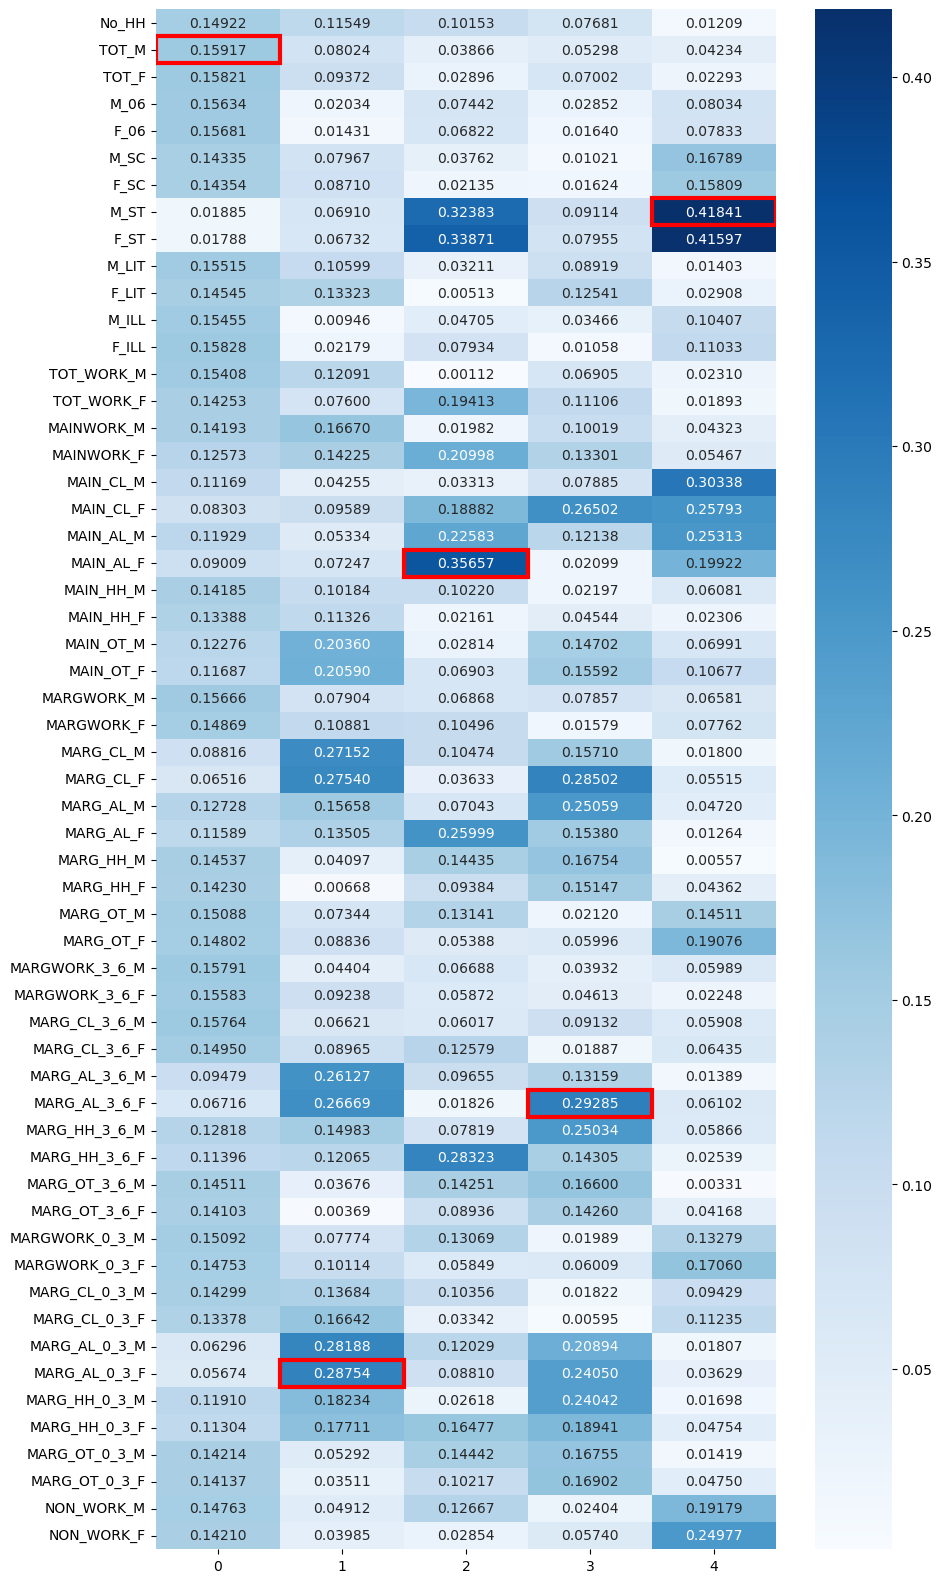

In [32]:
#Compare how the original features influence various PCs
from matplotlib.patches import Rectangle

plt.figure(figsize = (10,20))
ax =sns.heatmap(abs(PC5), annot = True, cmap = 'Blues',fmt = '.5f');
column_max = PC5.abs().idxmax(axis=0)

for col, variable in enumerate(PC5.columns):
    position = PC5.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))


-PC5 M_ST

-PC4 MARG_AL_3_6_F

-PC3 MAIN_AL_F

-PC2 MARG_AL_0_3_F .28188

-PC1 TOT_M



In [33]:
#In order to calculate PC scores we need loadings, below:
PC5.head()

0         1         2         3         4
No_HH  0.149222 -0.115487  0.101528  0.076814 -0.012090
TOT_M  0.159169 -0.080239 -0.038662  0.052976 -0.042344
TOT_F  0.158209 -0.093718  0.028959  0.070022 -0.022927
M_06   0.156340 -0.020341 -0.074419  0.028520 -0.080339
F_06   0.156814 -0.014310 -0.068223  0.016398 -0.078326

In [34]:
#...and we need the original scaled features
datascaled.iloc[0]

No_HH            -1.038986
TOT_M            -0.874837
TOT_F            -0.937027
M_06             -0.624685
F_06             -0.561282
M_SC             -1.080201
F_SC             -1.079963
M_ST             -0.510440
F_ST             -0.574198
M_LIT            -0.939617
F_LIT            -0.965904
M_ILL            -0.644588
F_ILL            -0.837035
TOT_WORK_M       -1.012439
TOT_WORK_F       -1.155832
MAINWORK_M       -1.066369
MAINWORK_F       -1.124355
MAIN_CL_M        -1.144964
MAIN_CL_F        -1.180238
MAIN_AL_M        -0.948406
MAIN_AL_F        -0.898818
MAIN_HH_M        -0.917053
MAIN_HH_F        -0.895765
MAIN_OT_M        -0.923768
MAIN_OT_F        -0.989318
MARGWORK_M       -0.570019
MARGWORK_F       -1.039881
MARG_CL_M        -0.347274
MARG_CL_F        -0.759467
MARG_AL_M        -0.331878
MARG_AL_F        -0.934181
MARG_HH_M        -0.465296
MARG_HH_F        -0.661238
MARG_OT_M        -0.665594
MARG_OT_F        -0.797562
MARGWORK_3_6_M   -0.731300
MARGWORK_3_6_F   -0.787295
M

In [35]:
#We need to perform a dot product between the loadings and features to obtain the scores
for i in PC5.columns:
    pc_score = np.dot(PC5[i], datascaled.iloc[0])
    print(round(pc_score, 6), end = ' ')

-5.528161 0.430378 -1.473827 -1.278049 0.376358 

In [36]:
#Above step involves a lot of hard work. Let's do it the easier way
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=5, random_state=123)
pca_score = pca.fit_transform(datascaled)

In [37]:
#Just create a dataframe out of fit_transformed scaled data above
#Note: Notice the output of cell 34 and the first row of the dataframe below
pca_final = pd.DataFrame(pca_score, columns = PC5.columns)
pca_final.head(10)

0         1         2         3         4
0 -5.528161  0.430378 -1.473827 -1.278049  0.376358
1 -5.492016 -0.106110 -2.015641 -1.750168 -0.006857
2 -7.474643 -0.217194 -0.247428  0.006079  0.556282
3 -7.919737 -0.652311 -0.659220 -0.735550  0.272465
4 -5.175695  2.304059 -1.157327  1.060796  1.080249
5 -3.647563  4.598733 -1.742810  3.301079  1.212639
6 -6.178820 -0.256962 -1.234310 -0.121392 -0.173580
7 -5.436802  0.237215 -1.664352 -1.163284  0.220704
8 -6.099449  0.004985 -1.563508 -1.537818  0.364566
9 -4.972562 -1.970847 -1.707058 -0.676605  0.614131

In [38]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

NameError: name 'pca_final_df' is not defined

<Figure size 1000x800 with 0 Axes>

PC5 M_ST = Scheduled Tribes population Male

-PC4 MARG_AL_3_6_F = Marginal Agriculture Labourers Population 3-6 Female

-PC3 MAIN_AL_F = Main Agricultural Labourers Population Female

-PC2 MARG_AL_0_3_F = Marginal Agriculture Labourers Population 0-3 Female

-PC1 TOT_M = Total population Male

In [39]:
PC5.head()

0         1         2         3         4
No_HH  0.149222 -0.115487  0.101528  0.076814 -0.012090
TOT_M  0.159169 -0.080239 -0.038662  0.052976 -0.042344
TOT_F  0.158209 -0.093718  0.028959  0.070022 -0.022927
M_06   0.156340 -0.020341 -0.074419  0.028520 -0.080339
F_06   0.156814 -0.014310 -0.068223  0.016398 -0.078326

In [40]:
PC5.columns = ['PC1','PC2','PC3','PC4','PC5']
PC5

PC1       PC2       PC3       PC4       PC5
No_HH           0.149222 -0.115487  0.101528  0.076814 -0.012090
TOT_M           0.159169 -0.080239 -0.038662  0.052976 -0.042344
TOT_F           0.158209 -0.093718  0.028959  0.070022 -0.022927
M_06            0.156340 -0.020341 -0.074419  0.028520 -0.080339
F_06            0.156814 -0.014310 -0.068223  0.016398 -0.078326
M_SC            0.143350 -0.079667 -0.037619  0.010210 -0.167893
F_SC            0.143537 -0.087098  0.021350  0.016244 -0.158092
M_ST            0.018849  0.069101  0.323827  0.091143  0.418412
F_ST            0.017878  0.067316  0.338705  0.079554  0.415965
M_LIT           0.155152 -0.105986 -0.032107  0.089187 -0.014033
F_LIT           0.145450 -0.133234 -0.005133  0.125412  0.029084
M_ILL           0.154551 -0.009460 -0.047054 -0.034665 -0.104073
F_ILL           0.158283 -0.021793  0.079345 -0.010578 -0.110332
TOT_WORK_M      0.154076 -0.120912 -0.001116  0.069046 -0.023104
TOT_WORK_F      0.142530 -0.076003  0.194130  0.111057 -0.018931
MAINWORK_M      0.141932 -0.166700  0.019821  0.100188 -0.043225
MAINWORK_F      0.125732 -0.142250  0.209976  0.133013 -0.054674
MAIN_CL_M       0.111692  0.042552  0.033131  0.078851 -0.303376
MAIN_CL_F       0.083035  0.095893  0.188822  0.265022 -0.257925
MAIN_AL_M       0.119291 -0.053342  0.225831 -0.121379 -0.253131
MAIN_AL_F       0.090089 -0.072467  0.356566 -0.020989 -0.199220
MAIN_HH_M       0.141850 -0.101835 -0.102202 -0.021969 -0.060812
MAIN_HH_F       0.133880 -0.113257  0.021613 -0.045436 -0.023063
MAIN_OT_M       0.122762 -0.203602 -0.028144  0.147025  0.069907
MAIN_OT_F       0.116866 -0.205899  0.069034  0.155917  0.106774
MARGWORK_M      0.156656  0.079039 -0.068685 -0.078572  0.065812
MARGWORK_F      0.148695  0.108813  0.104957  0.015788  0.077624
MARG_CL_M       0.088163  0.271522 -0.104745  0.157104 -0.018005
MARG_CL_F       0.065160  0.275398 -0.036325  0.285024 -0.055152
MARG_AL_M       0.127278  0.156579  0.070434 -0.250594 -0.047200
MARG_AL_F       0.115888  0.135048  0.259987 -0.153798 -0.012643
MARG_HH_M       0.145366  0.040974 -0.144347 -0.167540  0.005575
MARG_HH_F       0.142302  0.006685 -0.093838 -0.151469  0.043616
MARG_OT_M       0.150877 -0.073440 -0.131415  0.021195  0.145109
MARG_OT_F       0.148018 -0.088361 -0.053883  0.059961  0.190756
MARGWORK_3_6_M  0.157908 -0.044044 -0.066877  0.039319 -0.059886
MARGWORK_3_6_F  0.155831 -0.092383 -0.058718  0.046130 -0.022476
MARG_CL_3_6_M   0.157640  0.066208 -0.060172 -0.091315  0.059078
MARG_CL_3_6_F   0.149501  0.089651  0.125792  0.018865  0.064349
MARG_AL_3_6_M   0.094785  0.261268 -0.096551  0.131591 -0.013887
MARG_AL_3_6_F   0.067158  0.266691 -0.018256  0.292845 -0.061019
MARG_HH_3_6_M   0.128184  0.149831  0.078194 -0.250337 -0.058665
MARG_HH_3_6_F   0.113959  0.120648  0.283235 -0.143045 -0.025386
MARG_OT_3_6_M   0.145108  0.036763 -0.142511 -0.166002  0.003315
MARG_OT_3_6_F   0.141029 -0.003685 -0.089356 -0.142599  0.041678
MARGWORK_0_3_M  0.150922 -0.077739 -0.130687  0.019887  0.132794
MARGWORK_0_3_F  0.147534 -0.101141 -0.058489  0.060087  0.170596
MARG_CL_0_3_M   0.142987  0.136839 -0.103565 -0.018223  0.094293
MARG_CL_0_3_F   0.133784  0.166416  0.033423  0.005954  0.112351
MARG_AL_0_3_M   0.062964  0.281881 -0.120293  0.208941 -0.018070
MARG_AL_0_3_F   0.056741  0.287541 -0.088097  0.240499 -0.036293
MARG_HH_0_3_M   0.119102  0.182341  0.026176 -0.240416  0.016981
MARG_HH_0_3_F   0.113044  0.177112  0.164774 -0.189408  0.047538
MARG_OT_0_3_M   0.142140  0.052925 -0.144419 -0.167554  0.014187
MARG_OT_0_3_F   0.141370  0.035109 -0.102175 -0.169020  0.047504
NON_WORK_M      0.147629 -0.049122 -0.126673  0.024036  0.191790
NON_WORK_F      0.142103 -0.039848 -0.028545  0.057402  0.249765

In [43]:
PC5.shape

(57, 5)

In [44]:
#Scatterplots of all possible variable pairs 
def hide_current_axis(*args, **kwds): 
plt.gca().set_visible(False) 
g = sns.pairplot(std_places) 
g.map_diag(hide_current_axis) 


IndentationError: expected an indented block after function definition on line 2 (798119297.py, line 3)

In [45]:
#Factor Rotation
fit1 = FactorAnalyzer(n_factors=5, rotation='varimax', method='principal')  
factor_rotation= fit1.fit(datascaled)  
fit1_components= pd.DataFrame(fit1.loadings_,columns=  ['Rc1', 'Rc2','Rc3','Rc4','Rc5'] ,index 
= datascaled.columns)  
fit1_components['h2']  = np.round(fit1.get_communalities(),2)  
fit1_components['u2']  = np.round(fit1.get_uniquenesses(),2)  
np.round(fit1_components,2)

Rc1   Rc2   Rc3   Rc4   Rc5    h2    u2
No_HH           0.85  0.04  0.39  0.22  0.14  0.95  0.05
TOT_M           0.89  0.16  0.23  0.31 -0.06  0.97  0.03
TOT_F           0.89  0.12  0.31  0.27  0.05  0.98  0.02
M_06            0.79  0.28  0.20  0.39 -0.13  0.91  0.09
F_06            0.77  0.27  0.21  0.42 -0.12  0.91  0.09
M_SC            0.77  0.11  0.32  0.30 -0.20  0.84  0.16
F_SC            0.76  0.08  0.39  0.29 -0.11  0.84  0.16
M_ST           -0.01  0.09  0.10  0.07  0.88  0.80  0.20
F_ST           -0.03  0.07  0.12  0.08  0.89  0.82  0.18
M_LIT           0.92  0.13  0.22  0.22 -0.02  0.97  0.03
F_LIT           0.93  0.08  0.21  0.12  0.06  0.93  0.07
M_ILL           0.72  0.23  0.25  0.48 -0.13  0.88  0.12
F_ILL           0.72  0.18  0.44  0.45  0.02  0.94  0.06
TOT_WORK_M      0.92  0.07  0.27  0.23  0.00  0.97  0.03
TOT_WORK_F      0.74  0.11  0.52  0.20  0.27  0.94  0.06
MAINWORK_M      0.93 -0.02  0.31  0.10 -0.00  0.96  0.04
MAINWORK_F      0.75 -0.04  0.56  0.04  0.24  0.94  0.06
MAIN_CL_M       0.42  0.37  0.49  0.26 -0.20  0.65  0.35
MAIN_CL_F       0.24  0.54  0.64  0.01  0.10  0.77  0.23
MAIN_AL_M       0.45 -0.09  0.70  0.43  0.01  0.88  0.12
MAIN_AL_F       0.34 -0.13  0.81  0.21  0.24  0.88  0.12
MAIN_HH_M       0.83  0.04  0.13  0.32 -0.19  0.84  0.16
MAIN_HH_F       0.76 -0.07  0.25  0.32 -0.00  0.74  0.26
MAIN_OT_M       0.95 -0.08  0.12 -0.05  0.05  0.92  0.08
MAIN_OT_F       0.90 -0.12  0.22 -0.08  0.21  0.92  0.08
MARGWORK_M      0.63  0.36  0.05  0.66  0.03  0.96  0.04
MARGWORK_F      0.53  0.43  0.27  0.56  0.29  0.93  0.07
MARG_CL_M       0.13  0.89 -0.01  0.37 -0.00  0.95  0.05
MARG_CL_F       0.04  0.96  0.10  0.14  0.08  0.97  0.03
MARG_AL_M       0.24  0.27  0.26  0.87  0.05  0.96  0.04
MARG_AL_F       0.19  0.22  0.49  0.70  0.34  0.94  0.06
MARG_HH_M       0.61  0.21 -0.03  0.68 -0.17  0.92  0.08
MARG_HH_F       0.64  0.13  0.01  0.62 -0.07  0.82  0.18
MARG_OT_M       0.90  0.15 -0.08  0.34  0.01  0.96  0.04
MARG_OT_F       0.90  0.11 -0.01  0.28  0.16  0.93  0.07
MARGWORK_3_6_M  0.83  0.23  0.20  0.36 -0.10  0.93  0.07
MARGWORK_3_6_F  0.90  0.13  0.18  0.29 -0.07  0.95  0.05
MARG_CL_3_6_M   0.65  0.32  0.07  0.66  0.02  0.96  0.04
MARG_CL_3_6_F   0.55  0.39  0.32  0.53  0.30  0.93  0.07
MARG_AL_3_6_M   0.17  0.85  0.00  0.41  0.01  0.92  0.08
MARG_AL_3_6_F   0.05  0.95  0.14  0.13  0.09  0.95  0.05
MARG_HH_3_6_M   0.25  0.25  0.28  0.87  0.05  0.96  0.04
MARG_HH_3_6_F   0.19  0.19  0.54  0.67  0.36  0.93  0.07
MARG_OT_3_6_M   0.62  0.21 -0.02  0.68 -0.17  0.91  0.09
MARG_OT_3_6_F   0.65  0.11  0.02  0.59 -0.07  0.80  0.20
MARGWORK_0_3_M  0.90  0.14 -0.07  0.34 -0.00  0.96  0.04
MARGWORK_0_3_F  0.92  0.09 -0.00  0.26  0.13  0.93  0.07
MARG_CL_0_3_M   0.53  0.52 -0.04  0.61  0.04  0.93  0.07
MARG_CL_0_3_F   0.41  0.54  0.11  0.59  0.24  0.88  0.12
MARG_AL_0_3_M   0.03  0.93 -0.06  0.24 -0.01  0.92  0.08
MARG_AL_0_3_F  -0.01  0.95 -0.01  0.19  0.02  0.94  0.06
MARG_HH_0_3_M   0.20  0.33  0.13  0.87  0.07  0.92  0.08
MARG_HH_0_3_F   0.15  0.30  0.29  0.79  0.29  0.90  0.10
MARG_OT_0_3_M   0.58  0.23 -0.04  0.69 -0.16  0.90  0.10
MARG_OT_0_3_F   0.60  0.17 -0.01  0.67 -0.08  0.84  0.16
NON_WORK_M      0.86  0.19 -0.13  0.36  0.07  0.93  0.07
NON_WORK_F      0.81  0.18 -0.05  0.32  0.26  0.86  0.14

In [47]:
fit1_variance= pd.DataFrame(fit1.get_factor_variance(),columns=['Rc1', 
'Rc2','Rc3','Rc4','Rc5'] ,index = ['SS Loadings', 'Proportion Var','Cumulative Var'])  
np.round(fit1_variance,2) 

Rc1   Rc2   Rc3    Rc4   Rc5
SS Loadings     24.43  7.90  4.79  11.70  2.85
Proportion Var   0.43  0.14  0.08   0.21  0.05
Cumulative Var   0.43  0.57  0.65   0.86  0.91

In [48]:
#RC1, RC2, RC3, RC4 and RC5 are the 5 factors obtained after rotation
# RC1 gives maximum loadings to healthcare, arts and population so that the Urbanity factor is maintained.